<a href="https://colab.research.google.com/github/TininoFly/Proyect-Transporte-1/blob/main/Michell_Bd_Transport_FRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



- **Nombre de la empresa**: Transport-FRR
- **Descripción de la empresa**: Empresa de transporte de carga por carretera terreste.

Transport-FRR: La eficiencia en el transporte de carga terrestre es nuestra prioridad.

Transport-FRR es una empresa de transporte de carga por carretera terrestre que se destaca por su compromiso con la eficiencia y la puntualidad en la entrega de mercancías.

Nuestro objetivo principal es garantizar la satisfacción de nuestros clientes, ofreciéndoles un servicio confiable, seguro y a precios competitivos.

Nuestra experiencia en el manejo de diferentes tipos de carga y nuestra amplia red de transporte nos permiten llegar a cualquier destino dentro del territorio nacional, asegurando que tus productos lleguen a su destino final en perfectas condiciones y en el tiempo acordado.

# Preámbulo

In [1]:
!pip install plotly==5.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
# Agrega todas las librerias necesarias para el proyecto en su sección correspondiente

from mpl_toolkits.mplot3d import Axes3D



# Clustering
from sklearn.cluster import KMeans

# Machine Learning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import shap


# General Data Science
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px

Etapa 1: Carga y Limpieza de Datos


In [3]:
# Esta configuración permite que los dataframes se muestren completos.
pd.set_option('display.max_columns', None)

In [4]:
# PARÁMETROS (puedes modificar esta sección)

DATA_PATH1 = 'maquina.csv' # Si tienes el archivo en otro lugar, cámbialo.
RANDOM_STATE = 42 # ¡Cámbialo a tu número favorito!

In [5]:
DATA_PATH2 = 'Informacion.csv' # Si tienes el archivo en otro lugar, cámbialo.
RANDOM_STATE = 42 # ¡Cámbialo a tu número favorito

In [6]:
# Esta celda se encarga de cargar los datos. ¿La necesitas modificar? ¡Adelante!

df1 = pd.read_csv(DATA_PATH1)
print(f'{df1.shape[0]} rows x {df1.shape[1]} columns')
df1.head(5)

70 rows x 11 columns


ID_Camion  Año_maquina  Km_Maquina Patente         Tipo_vehiculo  \
0      YHHI         2017      2228.0  IPUPMX         Camión rígido   
1      3EQI         2016     10550.0  00Y5UP                Furgon   
2      IBU1         2016      9441.0  6376XQ  Tracto_Camion_rampla   
3      D6VJ         2016      5112.0  M37MNA             Camioneta   
4      L5HN         2018      7152.0  OGP6A2         Camión rígido   

   Capacidad_vehiculo(Ton) Tipo_combustible      Conductor  \
0                 2.393278           Diésel   Conductor_55   
1                 1.449277         Gasolina   Conductor_21   
2                37.349992           Diésel  Conductor_174   
3                 1.595356         Gasolina   Conductor_35   
4                17.004385           Diésel  Conductor_183   

   capacidad_estanque  Rendimiento_combustible_km_L Conductor_asignado  
0                 280                      4.428533      Conductor_100  
1                  85                     11.506491       Conductor_53  
2                 280                      2.078193      Conductor_163  
3                  48                     13.698572       Conductor_87  
4                 280                      5.423049      Conductor_148

In [7]:
# Esta celda se encarga de cargar los datos. ¿La necesitas modificar? ¡Adelante!

df2 = pd.read_csv(DATA_PATH2)
print(f'{df2.shape[0]} rows x {df2.shape[1]} columns')
df2.head(5)

58667 rows x 33 columns


ID_Camion Fecha_solicitud          Fecha_envio       Fecha_estimada  \
0      P95O      2022-02-21  2022-02-21 21:00:00  2022-02-22 01:00:00   
1      0P2Z      2023-10-23  2023-10-24 05:00:00  2023-10-26 13:00:00   
2      82EQ      2021-12-01  2021-12-04 00:00:00  2021-12-06 05:00:00   
3      L5HN      2024-04-23  2024-04-23 04:00:00  2024-04-23 17:00:00   
4      BFZG      2020-10-08  2020-10-08 08:00:00  2020-10-07 22:00:00   

         Fecha_entrega     Tipo_carga  Peso_solicitud (Ton) Ciudad_origen  \
0  2022-02-23 03:00:00   Construccion                 19.67      Zaragoza   
1  2023-10-26 07:00:00      bob_Papel                  1.16        Madrid   
2  2021-12-07 03:00:00      Vestuario                  3.11        Málaga   
3  2024-04-24 10:00:00         Frutas                  3.52        Bilbao   
4  2020-10-08 16:00:00  Plancha_acero                 16.61      Zaragoza   

  Ciudad_destino  Tiempo_viaje  Costo_viaje_km (€)  Num_orden  Num_factura  \
0         Málaga      9.621779            1.396952        NaN      27455.0   
1      Barcelona     10.204503            1.406995    93121.0      72561.0   
2         Murcia      4.336418            1.476155    17624.0      10036.0   
3       Valencia      8.550319            1.335894    41121.0      10344.0   
4         Madrid      3.763067            1.433970    89102.0      65886.0   

  Estado_envio  Combustible_consumido  Tarifa_combustible  Peajes  \
0    Entregado                 333.07               0.874   272.0   
1   En reparto                 481.40               1.988    90.0   
2   En reparto                  72.90               0.906    64.0   
3  En tránsito                 170.46               1.664   171.0   
4    Retrasado                  62.94               1.621   273.0   

   Distancia_km Name_client Clasificacion_carga Riesgo_carga  \
0       10419.0       EXXES          Voluminoso        Medio   
1        9623.0        GASP          Voluminoso         Bajo   
2       10335.0        GASP             General         Bajo   
3           NaN       JSVOL          Perecedero         Alto   
4       10486.0      DN-ONE           Peligroso         Bajo   

   Temperatura_controlada  Num_peajes  Costo_total_peajes  \
0                   False         3.0           36.454016   
1                    True         0.0           32.808198   
2                   False         1.0           36.838596   
3                   False         4.0           94.983943   
4                   False         0.0           30.293469   

   Precio_litro_combustible  Litros_consumidos  Costo_total_combustible  \
0                     1.947             114.71                   168.77   
1                     2.355             438.79                   441.06   
2                     1.008              44.06                   784.94   
3                       NaN             158.27                   318.75   
4                     2.009             116.76                   175.98   

   Distancia_aproximada_km  Tiempo_estimado_horas  Peso_carga  Costo_viaje  \
0                    790.0                 9.8750         NaN          NaN   
1                    620.0                 7.7500         NaN          NaN   
2                    280.0                 3.5000         NaN          NaN   
3                    500.0                 6.2500         NaN          NaN   
4                    325.0                 4.0625         NaN          NaN   

   Conductor  Plazo_entrega  
0        NaN              0  
1        NaN              2  
2        NaN              0  
3        NaN              0  
4        NaN              0

In [8]:
# 2. Exploracion de la estructura de los dataframes

df1.info()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_Camion                     70 non-null     object 
 1   Año_maquina                   70 non-null     int64  
 2   Km_Maquina                    70 non-null     float64
 3   Patente                       70 non-null     object 
 4   Tipo_vehiculo                 70 non-null     object 
 5   Capacidad_vehiculo(Ton)       70 non-null     float64
 6   Tipo_combustible              70 non-null     object 
 7   Conductor                     70 non-null     object 
 8   capacidad_estanque            70 non-null     int64  
 9   Rendimiento_combustible_km_L  70 non-null     float64
 10  Conductor_asignado            70 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 6.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58667 entries, 0 t

In [9]:
# 3. visulizar las primeras filas

df1.head()
df2.head()


ID_Camion Fecha_solicitud          Fecha_envio       Fecha_estimada  \
0      P95O      2022-02-21  2022-02-21 21:00:00  2022-02-22 01:00:00   
1      0P2Z      2023-10-23  2023-10-24 05:00:00  2023-10-26 13:00:00   
2      82EQ      2021-12-01  2021-12-04 00:00:00  2021-12-06 05:00:00   
3      L5HN      2024-04-23  2024-04-23 04:00:00  2024-04-23 17:00:00   
4      BFZG      2020-10-08  2020-10-08 08:00:00  2020-10-07 22:00:00   

         Fecha_entrega     Tipo_carga  Peso_solicitud (Ton) Ciudad_origen  \
0  2022-02-23 03:00:00   Construccion                 19.67      Zaragoza   
1  2023-10-26 07:00:00      bob_Papel                  1.16        Madrid   
2  2021-12-07 03:00:00      Vestuario                  3.11        Málaga   
3  2024-04-24 10:00:00         Frutas                  3.52        Bilbao   
4  2020-10-08 16:00:00  Plancha_acero                 16.61      Zaragoza   

  Ciudad_destino  Tiempo_viaje  Costo_viaje_km (€)  Num_orden  Num_factura  \
0         Málaga      9.621779            1.396952        NaN      27455.0   
1      Barcelona     10.204503            1.406995    93121.0      72561.0   
2         Murcia      4.336418            1.476155    17624.0      10036.0   
3       Valencia      8.550319            1.335894    41121.0      10344.0   
4         Madrid      3.763067            1.433970    89102.0      65886.0   

  Estado_envio  Combustible_consumido  Tarifa_combustible  Peajes  \
0    Entregado                 333.07               0.874   272.0   
1   En reparto                 481.40               1.988    90.0   
2   En reparto                  72.90               0.906    64.0   
3  En tránsito                 170.46               1.664   171.0   
4    Retrasado                  62.94               1.621   273.0   

   Distancia_km Name_client Clasificacion_carga Riesgo_carga  \
0       10419.0       EXXES          Voluminoso        Medio   
1        9623.0        GASP          Voluminoso         Bajo   
2       10335.0        GASP             General         Bajo   
3           NaN       JSVOL          Perecedero         Alto   
4       10486.0      DN-ONE           Peligroso         Bajo   

   Temperatura_controlada  Num_peajes  Costo_total_peajes  \
0                   False         3.0           36.454016   
1                    True         0.0           32.808198   
2                   False         1.0           36.838596   
3                   False         4.0           94.983943   
4                   False         0.0           30.293469   

   Precio_litro_combustible  Litros_consumidos  Costo_total_combustible  \
0                     1.947             114.71                   168.77   
1                     2.355             438.79                   441.06   
2                     1.008              44.06                   784.94   
3                       NaN             158.27                   318.75   
4                     2.009             116.76                   175.98   

   Distancia_aproximada_km  Tiempo_estimado_horas  Peso_carga  Costo_viaje  \
0                    790.0                 9.8750         NaN          NaN   
1                    620.0                 7.7500         NaN          NaN   
2                    280.0                 3.5000         NaN          NaN   
3                    500.0                 6.2500         NaN          NaN   
4                    325.0                 4.0625         NaN          NaN   

   Conductor  Plazo_entrega  
0        NaN              0  
1        NaN              2  
2        NaN              0  
3        NaN              0  
4        NaN              0

In [10]:
# 4. Manejo de valores faltantes, la cantidad de valores nulos en cada columna

df1.isnull().sum()
df2.isnull().sum()


ID_Camion                       0
Fecha_solicitud                 0
Fecha_envio                     0
Fecha_estimada                  0
Fecha_entrega                   0
Tipo_carga                      0
Peso_solicitud (Ton)            0
Ciudad_origen                   0
Ciudad_destino                  0
Tiempo_viaje                 7263
Costo_viaje_km (€)              0
Num_orden                   15677
Num_factura                     0
Estado_envio                    0
Combustible_consumido           0
Tarifa_combustible              0
Peajes                          0
Distancia_km                15916
Name_client                     0
Clasificacion_carga             0
Riesgo_carga                    0
Temperatura_controlada          0
Num_peajes                      0
Costo_total_peajes              0
Precio_litro_combustible    27280
Litros_consumidos               0
Costo_total_combustible         0
Distancia_aproximada_km      7263
Tiempo_estimado_horas        7263
Peso_carga                  58667
Costo_viaje                 58667
Conductor                   58667
Plazo_entrega                   0
dtype: int64

In [11]:
# 5. completa los valores faltantes con la media las columnas numericas
# imputar valores faltantes en df1

for col in df1.columns:
  if pd.api.types.is_numeric_dtype(df1[col]):
    df1[col]= df1[col].fillna(df1[col].mean())

# imputar valores faltantes en df2

for col in df2.columns:
  if pd.api.types.is_numeric_dtype(df2[col]):
    df2[col]= df2[col].fillna(df2[col].mean())



In [12]:
# 5.1 Elimina filas con al menos un valores faltantes en df

df1_nan= df1.dropna()
df2_nan= df2.dropna()

In [13]:
# 6. Manejo de duplicados solo valos numericos

df1_duplicados= df1.duplicated().sum()
df2_duplicados= df2.duplicated().sum()
print(f'{df1_duplicados} filas duplicadas en df1')
print(f'{df2_duplicados} filas duplicadas en df2')

0 filas duplicadas en df1
0 filas duplicadas en df2


In [14]:
df1.isnull().sum()
df2.isnull().sum()

ID_Camion                       0
Fecha_solicitud                 0
Fecha_envio                     0
Fecha_estimada                  0
Fecha_entrega                   0
Tipo_carga                      0
Peso_solicitud (Ton)            0
Ciudad_origen                   0
Ciudad_destino                  0
Tiempo_viaje                    0
Costo_viaje_km (€)              0
Num_orden                       0
Num_factura                     0
Estado_envio                    0
Combustible_consumido           0
Tarifa_combustible              0
Peajes                          0
Distancia_km                    0
Name_client                     0
Clasificacion_carga             0
Riesgo_carga                    0
Temperatura_controlada          0
Num_peajes                      0
Costo_total_peajes              0
Precio_litro_combustible        0
Litros_consumidos               0
Costo_total_combustible         0
Distancia_aproximada_km         0
Tiempo_estimado_horas           0
Peso_carga                  58667
Costo_viaje                 58667
Conductor                   58667
Plazo_entrega                   0
dtype: int64



**Etapa 1 Explicación:**

La primera etapa de este proyecto, centrada en la limpieza y preparación de los datos, fue crucial para asegurar la calidad y la confiabilidad de los análisis posteriores. Se logró consolidar la información de dos fuentes en un único DataFrame, df_miche, y se aplicaron diversas técnicas:

*	Valores faltantes: Se imputaron los valores faltantes en columnas clave utilizando la media, evitando la pérdida de información y manteniendo la integridad del dataset.
*	Creación de variables relevantes: Se generaron nuevas columnas como 'Tramos' y 'Combustible_consumo' para facilitar el análisis de rutas y el consumo de combustible, respectivamente.
*	Eliminación de redundancias: Se descartaron columnas innecesarias, simplificando el dataset y mejorando la eficiencia de los procesos posteriores.
*	Corrección de inconsistencias: Se identificó y solucionó un problema en la actualización de la columna 'Km_Maquina', asegurando la precisión de los datos de kilometraje.
*	Adecuación de tipos de datos: Se convirtieron las columnas de fechas a un formato apropiado para el análisis temporal, y se crearon variables numéricas para facilitar la aplicación de algoritmos de Machine Learning.
*	Categorización y codificación: Se categorizó la variable Delta_T para el análisis de puntualidad en las entregas y se codificaron las variables categóricas para su uso en modelos de Machine Learning.


In [15]:
# unir los dataframes

df_miche = pd.merge(df1, df2, on='ID_Camion', how ='right')
df_miche.head()

ID_Camion  Año_maquina  Km_Maquina Patente         Tipo_vehiculo  \
0      P95O         2020      1325.0  OXZL0D  Tracto_Camion_rampla   
1      0P2Z         2019      9806.0  50R174         Camión rígido   
2      82EQ         2016     10481.0  HZXDV8  Tracto_Camion_rampla   
3      L5HN         2018      7152.0  OGP6A2         Camión rígido   
4      BFZG         2018      7207.0  F67KUW         Camión rígido   

   Capacidad_vehiculo(Ton) Tipo_combustible    Conductor_x  \
0                38.087607           Diésel   Conductor_25   
1                19.536599           Diésel  Conductor_147   
2                26.628097           Diésel  Conductor_200   
3                17.004385           Diésel  Conductor_183   
4                16.727478           Diésel   Conductor_35   

   capacidad_estanque  Rendimiento_combustible_km_L Conductor_asignado  \
0                 280                      1.748389       Conductor_61   
1                 280                      5.223621       Conductor_17   
2                 280                      2.054746       Conductor_61   
3                 280                      5.423049      Conductor_148   
4                 280                      5.899415       Conductor_79   

  Fecha_solicitud          Fecha_envio       Fecha_estimada  \
0      2022-02-21  2022-02-21 21:00:00  2022-02-22 01:00:00   
1      2023-10-23  2023-10-24 05:00:00  2023-10-26 13:00:00   
2      2021-12-01  2021-12-04 00:00:00  2021-12-06 05:00:00   
3      2024-04-23  2024-04-23 04:00:00  2024-04-23 17:00:00   
4      2020-10-08  2020-10-08 08:00:00  2020-10-07 22:00:00   

         Fecha_entrega     Tipo_carga  Peso_solicitud (Ton) Ciudad_origen  \
0  2022-02-23 03:00:00   Construccion                 19.67      Zaragoza   
1  2023-10-26 07:00:00      bob_Papel                  1.16        Madrid   
2  2021-12-07 03:00:00      Vestuario                  3.11        Málaga   
3  2024-04-24 10:00:00         Frutas                  3.52        Bilbao   
4  2020-10-08 16:00:00  Plancha_acero                 16.61      Zaragoza   

  Ciudad_destino  Tiempo_viaje  Costo_viaje_km (€)     Num_orden  Num_factura  \
0         Málaga      9.621779            1.396952  54801.711631      27455.0   
1      Barcelona     10.204503            1.406995  93121.000000      72561.0   
2         Murcia      4.336418            1.476155  17624.000000      10036.0   
3       Valencia      8.550319            1.335894  41121.000000      10344.0   
4         Madrid      3.763067            1.433970  89102.000000      65886.0   

  Estado_envio  Combustible_consumido  Tarifa_combustible  Peajes  \
0    Entregado                 333.07               0.874   272.0   
1   En reparto                 481.40               1.988    90.0   
2   En reparto                  72.90               0.906    64.0   
3  En tránsito                 170.46               1.664   171.0   
4    Retrasado                  62.94               1.621   273.0   

   Distancia_km Name_client Clasificacion_carga Riesgo_carga  \
0  10419.000000       EXXES          Voluminoso        Medio   
1   9623.000000        GASP          Voluminoso         Bajo   
2  10335.000000        GASP             General         Bajo   
3   6254.518818       JSVOL          Perecedero         Alto   
4  10486.000000      DN-ONE           Peligroso         Bajo   

   Temperatura_controlada  Num_peajes  Costo_total_peajes  \
0                   False         3.0           36.454016   
1                    True         0.0           32.808198   
2                   False         1.0           36.838596   
3                   False         4.0           94.983943   
4                   False         0.0           30.293469   

   Precio_litro_combustible  Litros_consumidos  Costo_total_combustible  \
0                  1.947000             114.71                   168.77   
1                  2.355000             438.79                   441.06   
2                  1.008000              4

In [16]:
# crear una columna llamada tramos

df_miche['Tramos'] = df_miche['Ciudad_origen']+ ' - ' +df_miche['Ciudad_destino']
df_miche.head()

ID_Camion  Año_maquina  Km_Maquina Patente         Tipo_vehiculo  \
0      P95O         2020      1325.0  OXZL0D  Tracto_Camion_rampla   
1      0P2Z         2019      9806.0  50R174         Camión rígido   
2      82EQ         2016     10481.0  HZXDV8  Tracto_Camion_rampla   
3      L5HN         2018      7152.0  OGP6A2         Camión rígido   
4      BFZG         2018      7207.0  F67KUW         Camión rígido   

   Capacidad_vehiculo(Ton) Tipo_combustible    Conductor_x  \
0                38.087607           Diésel   Conductor_25   
1                19.536599           Diésel  Conductor_147   
2                26.628097           Diésel  Conductor_200   
3                17.004385           Diésel  Conductor_183   
4                16.727478           Diésel   Conductor_35   

   capacidad_estanque  Rendimiento_combustible_km_L Conductor_asignado  \
0                 280                      1.748389       Conductor_61   
1                 280                      5.223621       Conductor_17   
2                 280                      2.054746       Conductor_61   
3                 280                      5.423049      Conductor_148   
4                 280                      5.899415       Conductor_79   

  Fecha_solicitud          Fecha_envio       Fecha_estimada  \
0      2022-02-21  2022-02-21 21:00:00  2022-02-22 01:00:00   
1      2023-10-23  2023-10-24 05:00:00  2023-10-26 13:00:00   
2      2021-12-01  2021-12-04 00:00:00  2021-12-06 05:00:00   
3      2024-04-23  2024-04-23 04:00:00  2024-04-23 17:00:00   
4      2020-10-08  2020-10-08 08:00:00  2020-10-07 22:00:00   

         Fecha_entrega     Tipo_carga  Peso_solicitud (Ton) Ciudad_origen  \
0  2022-02-23 03:00:00   Construccion                 19.67      Zaragoza   
1  2023-10-26 07:00:00      bob_Papel                  1.16        Madrid   
2  2021-12-07 03:00:00      Vestuario                  3.11        Málaga   
3  2024-04-24 10:00:00         Frutas                  3.52        Bilbao   
4  2020-10-08 16:00:00  Plancha_acero                 16.61      Zaragoza   

  Ciudad_destino  Tiempo_viaje  Costo_viaje_km (€)     Num_orden  Num_factura  \
0         Málaga      9.621779            1.396952  54801.711631      27455.0   
1      Barcelona     10.204503            1.406995  93121.000000      72561.0   
2         Murcia      4.336418            1.476155  17624.000000      10036.0   
3       Valencia      8.550319            1.335894  41121.000000      10344.0   
4         Madrid      3.763067            1.433970  89102.000000      65886.0   

  Estado_envio  Combustible_consumido  Tarifa_combustible  Peajes  \
0    Entregado                 333.07               0.874   272.0   
1   En reparto                 481.40               1.988    90.0   
2   En reparto                  72.90               0.906    64.0   
3  En tránsito                 170.46               1.664   171.0   
4    Retrasado                  62.94               1.621   273.0   

   Distancia_km Name_client Clasificacion_carga Riesgo_carga  \
0  10419.000000       EXXES          Voluminoso        Medio   
1   9623.000000        GASP          Voluminoso         Bajo   
2  10335.000000        GASP             General         Bajo   
3   6254.518818       JSVOL          Perecedero         Alto   
4  10486.000000      DN-ONE           Peligroso         Bajo   

   Temperatura_controlada  Num_peajes  Costo_total_peajes  \
0                   False         3.0           36.454016   
1                    True         0.0           32.808198   
2                   False         1.0           36.838596   
3                   False         4.0           94.983943   
4                   False         0.0           30.293469   

   Precio_litro_combustible  Litros_consumidos  Costo_total_combustible  \
0                  1.947000             114.71                   168.77   
1                  2.355000             438.79                   441.06   
2                  1.008000              4

In [17]:
# Eliminar columnas
df_miche.drop(columns=['Peso_carga','Conductor_y','Distancia_km','Costo_total_combustible',
                      'Temperatura_controlada','Peajes','Tiempo_viaje','Combustible_consumido',
                      'Riesgo_carga','Clasificacion_carga','Num_factura','Name_client','Num_peajes',
                      'Num_orden','Conductor_x','Litros_consumidos','Estado_envio','Tarifa_combustible',
                      	],inplace=True)
df_miche.head(85)

ID_Camion  Año_maquina  Km_Maquina Patente         Tipo_vehiculo  \
0       P95O         2020      1325.0  OXZL0D  Tracto_Camion_rampla   
1       0P2Z         2019      9806.0  50R174         Camión rígido   
2       82EQ         2016     10481.0  HZXDV8  Tracto_Camion_rampla   
3       L5HN         2018      7152.0  OGP6A2         Camión rígido   
4       BFZG         2018      7207.0  F67KUW         Camión rígido   
..       ...          ...         ...     ...                   ...   
80      8JHD         2018      1934.0  MBT7RD        Tráiler_rampla   
81      XIBU         2015      9842.0  EYO1U2             Camioneta   
82      TWJ4         2015      8747.0  1MMLNF  Tracto_Camion_rampla   
83      6MT7         2019      2191.0  7WJ0Y7  Tracto_Camion_rampla   
84      P95O         2020      1325.0  OXZL0D  Tracto_Camion_rampla   

    Capacidad_vehiculo(Ton) Tipo_combustible  capacidad_estanque  \
0                 38.087607           Diésel                 280   
1                 19.536599           Diésel                 280   
2                 26.628097           Diésel                 280   
3                 17.004385           Diésel                 280   
4                 16.727478           Diésel                 280   
..                      ...              ...                 ...   
80                31.227438           Diésel                 280   
81                 1.237473           Diésel                  68   
82                32.087487           Diésel                 280   
83                30.850982           Diésel                 280   
84                38.087607           Diésel                 280   

    Rendimiento_combustible_km_L Conductor_asignado Fecha_solicitud  \
0                       1.748389       Conductor_61      2022-02-21   
1                       5.223621       Conductor_17      2023-10-23   
2                       2.054746       Conductor_61      2021-12-01   
3                       5.423049      Conductor_148      2024-04-23   
4                       5.899415       Conductor_79      2020-10-08   
..                           ...                ...             ...   
80                      2.434148       Conductor_28      2021-11-13   
81                     12.172805       Conductor_89      2021-03-26   
82                      1.674448      Conductor_118      2023-01-05   
83                      1.984324      Conductor_155      2021-08-08   
84                      1.748389       Conductor_61      2021-02-06   

            Fecha_envio       Fecha_estimada        Fecha_entrega  \
0   2022-02-21 21:00:00  2022-02-22 01:00:00  2022-02-23 03:00:00   
1   2023-10-24 05:00:00  2023-10-26 13:00:00  2023-10-26 07:00:00   
2   2021-12-04 00:00:00  2021-12-06 05:00:00  2021-12-07 03:00:00   
3   2024-04-23 04:00:00  2024-04-23 17:00:00  2024-04-24 10:00:00   
4   2020-10-08 08:00:00  2020-10-07 22:00:00  2020-10-08 16:00:00   
..                  ...                  ...                  ...   
80  2021-11-17 02:00:00  2021-11-18 11:00:00  2021-11-18 03:00:00   
81  2021-03-27 04:00:00  2021-03-27 12:00:00  2021-03-28 11:00:00   
82  2023-01-06 15:00:00  2023-01-10 10:00:00  2023-01-11 07:00:00   
83  2021-08-08 21:00:00  2021-08-08 12:00:00  2021-08-09 03:00:00   
84  2021-02-08 16:00:00  2021-02-10 02:00:00  2021-02-09 20:00:00   

       Tipo_carga  Peso_solicitud (Ton) Ciudad_origen Ciudad_destino  \
0    Construccion                 19.67      Zaragoza         Málaga   
1       bob_Papel                  1.16        Madrid      Barcelona   
2       Vestuario                  3.11        Málaga         Murcia   
3          Frutas                  3.52        Bilbao       Valencia   
4   Plancha_acero                 16.61      Zaragoza         Madrid   
..            ...                   ...           ...            ...   
80      Tub_acero                 14.97       Sevilla         Bilbao   
81    Electronica                  0.49        Madrid      Barcelona   
82 

In [18]:
# imprimir Fecha_salida_mac y Fecha_envio de un ID_Camion

truck_id = '7BPZ'

filtered_df = df_miche[df_miche['ID_Camion'] == truck_id]

print(filtered_df[['Fecha_solicitud', 'Fecha_envio']].head())

     Fecha_solicitud          Fecha_envio
19        2025-03-10  2025-03-13 16:00:00
394       2020-09-27  2020-09-29 06:00:00
455       2024-01-31  2024-02-01 11:00:00
734       2021-04-17  2021-04-19 00:00:00
1777      2023-03-05  2023-03-05 11:00:00


In [19]:
# Km_maquina no se actualiza despues de una entraga.

df_miche = df_miche.sort_values(by=['ID_Camion', 'Fecha_solicitud'])
df_miche['Km_Maquina_Acumulada'] = df_miche.groupby('ID_Camion')['Distancia_aproximada_km'].cumsum()
df_miche['Km_Maquina_Acumulada'] = df_miche['Km_Maquina_Acumulada'] + df_miche.groupby('ID_Camion')['Km_Maquina'].transform('first')
df_miche['Km_Maquina'] = df_miche['Km_Maquina_Acumulada']
df_miche = df_miche.drop(columns=['Km_Maquina_Acumulada'])

In [20]:
id_camion = '7BPZ'
primeras_fechas_camion = df_miche[df_miche['ID_Camion'] == id_camion].sort_values(by=['Fecha_solicitud'])[['ID_Camion', 'Fecha_solicitud','Km_Maquina','Distancia_aproximada_km']].head(10)
print(primeras_fechas_camion)

      ID_Camion Fecha_solicitud  Km_Maquina  Distancia_aproximada_km
12282      7BPZ      2020-01-25      4926.0                    700.0
30250      7BPZ      2020-01-27      5716.0                    790.0
31805      7BPZ      2020-01-31      6706.0                    990.0
35352      7BPZ      2020-04-03      7031.0                    325.0
18228      7BPZ      2020-04-06      7356.0                    325.0
55404      7BPZ      2020-04-09      7986.0                    630.0
18429      7BPZ      2020-04-18      8456.0                    470.0
37069      7BPZ      2020-05-27      9296.0                    840.0
8684       7BPZ      2020-05-29      9576.0                    280.0
41152      7BPZ      2020-06-10      9856.0                    280.0


In [21]:
# Reemplazar los NaN por valor de la media

mean_Precio_litro_combustible = df_miche['Precio_litro_combustible'].mean()
df_miche['Precio_litro_combustible'].fillna(mean_Precio_litro_combustible, inplace=True)

mean_Distancia_aproximada_km = df_miche['Distancia_aproximada_km'].mean()
df_miche['Distancia_aproximada_km'].fillna(mean_Distancia_aproximada_km, inplace=True)

mean_Rendimiento_combustible_km_L = df_miche['Tiempo_estimado_horas'].mean()
df_miche['Tiempo_estimado_horas'].fillna(mean_Rendimiento_combustible_km_L, inplace=True)

<ipython-input-21-27a05279d026>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miche['Precio_litro_combustible'].fillna(mean_Precio_litro_combustible, inplace=True)
<ipython-input-21-27a05279d026>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [22]:
# cambiar tipo de dato en columnas con fechas

df_miche['Fecha_solicitud'] = pd.to_datetime(df_miche['Fecha_solicitud'])
df_miche['Fecha_envio'] = pd.to_datetime(df_miche['Fecha_envio'])
df_miche['Fecha_entrega'] = pd.to_datetime(df_miche['Fecha_entrega'])
df_miche['Fecha_estimada'] = pd.to_datetime(df_miche['Fecha_estimada'])

# Diferencia de horas en las entregas

df_miche['Delta_T'] = (df_miche['Fecha_entrega'] - df_miche['Fecha_estimada']).dt.total_seconds() / 3600

#df_miche['Delta_T']= df_miche['Fecha_entrega'] - df_miche['Fecha_estimada']
#df_miche['Delta_T'] = df_miche['Delta_T'].dt.components.hours

df_miche

ID_Camion  Año_maquina    Km_Maquina Patente  Tipo_vehiculo  \
5434       0DYF         2017  11506.000000  9AGY3W  Camión rígido   
32482      0DYF         2017  11926.000000  9AGY3W  Camión rígido   
10467      0DYF         2017  12556.000000  9AGY3W  Camión rígido   
20212      0DYF         2017  13176.000000  9AGY3W  Camión rígido   
9323       0DYF         2017  13476.000000  9AGY3W  Camión rígido   
...         ...          ...           ...     ...            ...   
36983      ZWUO         2018  83349.642752  9XM0OS         Furgon   
32155      ZWUO         2018  83899.642752  9XM0OS         Furgon   
20639      ZWUO         2018  84199.642752  9XM0OS         Furgon   
20831      ZWUO         2018  84439.642752  9XM0OS         Furgon   
30427      ZWUO         2018  85429.642752  9XM0OS         Furgon   

       Capacidad_vehiculo(Ton) Tipo_combustible  capacidad_estanque  \
5434                 18.375666           Diésel                 280   
32482                18.375666           Diésel                 280   
10467                18.375666           Diésel                 280   
20212                18.375666           Diésel                 280   
9323                 18.375666           Diésel                 280   
...                        ...              ...                 ...   
36983                 1.291585         Gasolina                  48   
32155                 1.291585         Gasolina                  48   
20639                 1.291585         Gasolina                  48   
20831                 1.291585         Gasolina                  48   
30427                 1.291585         Gasolina                  48   

       Rendimiento_combustible_km_L Conductor_asignado Fecha_solicitud  \
5434                       5.020121      Conductor_165      2020-01-01   
32482                      5.020121      Conductor_165      2020-01-02   
10467                      5.020121      Conductor_165      2020-01-07   
20212                      5.020121      Conductor_165      2020-01-07   
9323                       5.020121      Conductor_165      2020-01-08   
...                             ...                ...             ...   
36983                     10.958113      Conductor_174      2025-02-16   
32155                     10.958113      Conductor_174      2025-02-20   
20639                     10.958113      Conductor_174      2025-02-25   
20831                     10.958113      Conductor_174      2025-03-22   
30427                     10.958113      Conductor_174      2025-04-18   

              Fecha_envio      Fecha_estimada       Fecha_entrega  \
5434  2020-01-04 00:00:00 2020-01-07 20:00:00 2020-01-07 23:00:00   
32482 2020-01-05 18:00:00 2020-01-07 11:00:00 2020-01-07 19:00:00   
10467 2020-01-10 03:00:00 2020-01-14 01:00:00 2020-01-13 20:00:00   
20212 2020-01-09 23:00:00 2020-01-12 20:00:00 2020-01-13 05:00:00   
9323  2020-01-09 04:00:00 2020-01-09 19:00:00 2020-01-10 12:00:00   
...                   ...                 ...                 ...   
36983 2025-02-15 23:00:00 2025-02-16 17:00:00 2025-02-17 12:00:00   
32155 2025-02-23 17:00:00 2025-02-24 16:00:00 2025-02-25 20:00:00   
20639 2025-02-26 16:00:00 2025-02-26 23:00:00 2025-02-27 08:00:00   
20831 2025-03-23 08:00:00 2025-03-24 03:00:00 2025-03-24 08:00:00   
30427 2025-04-18 16:00:00 2025-04-22 14:00:00 2025-04-23 10:00:00   

         Tipo_carga  Peso_solicitud (Ton) Ciudad_origen Ciudad_destino  \
5434      Tub_acero                  7.64        Murcia         Madrid   
32482  Construccion                 15.21        Málaga         Madrid   
10467     Tub_acero                  6.06        Murcia      Barcelona   
20212     Vestuario                  2.55        Madrid      Barcelona   
9323        Jugetes                  0.24     Barcelona       Zaragoza   
...             ...                   ...           ...            ...   
36983   Electronica                  0.07     Barcelona       Valencia   
32155      Ver

In [23]:
# Reemplaza con el ID del camión que deseas consultar

id_camion = 'ZWUO'
primeras_fechas_camion = df_miche[df_miche['ID_Camion'] == id_camion].sort_values(by=['Fecha_solicitud'])[['ID_Camion', 'Fecha_solicitud','Km_Maquina','Distancia_aproximada_km']].head(10)
print(primeras_fechas_camion)

      ID_Camion Fecha_solicitud   Km_Maquina  Distancia_aproximada_km
939        ZWUO      2020-01-12  2879.045911               500.045911
24272      ZWUO      2020-02-02  3349.045911               470.000000
49751      ZWUO      2020-02-10  3979.045911               630.000000
20051      ZWUO      2020-02-17  4819.045911               840.000000
31564      ZWUO      2020-03-12  5144.045911               325.000000
11198      ZWUO      2020-04-04  5774.045911               630.000000
43531      ZWUO      2020-04-06  6404.045911               630.000000
21141      ZWUO      2020-04-13  7084.045911               680.000000
47567      ZWUO      2020-04-17  8694.045911               620.000000
39353      ZWUO      2020-04-17  8074.045911               990.000000


In [24]:
columnas_float64 = df_miche.select_dtypes(include=['float64']).columns
print(columnas_float64)

Index(['Km_Maquina', 'Capacidad_vehiculo(Ton)', 'Rendimiento_combustible_km_L',
       'Peso_solicitud (Ton)', 'Costo_viaje_km (€)', 'Costo_total_peajes',
       'Precio_litro_combustible', 'Distancia_aproximada_km',
       'Tiempo_estimado_horas', 'Costo_viaje', 'Delta_T'],
      dtype='object')


In [25]:
df_miche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58667 entries, 5434 to 30427
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID_Camion                     58667 non-null  object        
 1   Año_maquina                   58667 non-null  int64         
 2   Km_Maquina                    58667 non-null  float64       
 3   Patente                       58667 non-null  object        
 4   Tipo_vehiculo                 58667 non-null  object        
 5   Capacidad_vehiculo(Ton)       58667 non-null  float64       
 6   Tipo_combustible              58667 non-null  object        
 7   capacidad_estanque            58667 non-null  int64         
 8   Rendimiento_combustible_km_L  58667 non-null  float64       
 9   Conductor_asignado            58667 non-null  object        
 10  Fecha_solicitud               58667 non-null  datetime64[ns]
 11  Fecha_envio                   

In [26]:
# nueva columna consumo Combustible combustible por servicio.

df_miche['Combustible_consumo'] = df_miche['Distancia_aproximada_km'] / df_miche['Rendimiento_combustible_km_L']
df_miche['Total_Valor_combustible'] = df_miche['Combustible_consumo'] * df_miche['Precio_litro_combustible']

df_miche['Costo_viaje']= df_miche['Costo_viaje_km (€)']*df_miche['Distancia_aproximada_km']


In [27]:
# cambiar a int64

columnas_a_cambiar = ['Km_Maquina', 'Capacidad_vehiculo(Ton)', 'Rendimiento_combustible_km_L',
       'Peso_solicitud (Ton)', 'Costo_viaje_km (€)',
       'Costo_total_peajes', 'Precio_litro_combustible','Combustible_consumo',
       'Distancia_aproximada_km', 'Tiempo_estimado_horas', 'Costo_viaje','Total_Valor_combustible']

for columna in columnas_a_cambiar:
      df_miche[columna] = df_miche[columna].fillna(0).astype('int64')

In [28]:
df_miche

ID_Camion  Año_maquina  Km_Maquina Patente  Tipo_vehiculo  \
5434       0DYF         2017       11506  9AGY3W  Camión rígido   
32482      0DYF         2017       11926  9AGY3W  Camión rígido   
10467      0DYF         2017       12556  9AGY3W  Camión rígido   
20212      0DYF         2017       13176  9AGY3W  Camión rígido   
9323       0DYF         2017       13476  9AGY3W  Camión rígido   
...         ...          ...         ...     ...            ...   
36983      ZWUO         2018       83349  9XM0OS         Furgon   
32155      ZWUO         2018       83899  9XM0OS         Furgon   
20639      ZWUO         2018       84199  9XM0OS         Furgon   
20831      ZWUO         2018       84439  9XM0OS         Furgon   
30427      ZWUO         2018       85429  9XM0OS         Furgon   

       Capacidad_vehiculo(Ton) Tipo_combustible  capacidad_estanque  \
5434                        18           Diésel                 280   
32482                       18           Diésel                 280   
10467                       18           Diésel                 280   
20212                       18           Diésel                 280   
9323                        18           Diésel                 280   
...                        ...              ...                 ...   
36983                        1         Gasolina                  48   
32155                        1         Gasolina                  48   
20639                        1         Gasolina                  48   
20831                        1         Gasolina                  48   
30427                        1         Gasolina                  48   

       Rendimiento_combustible_km_L Conductor_asignado Fecha_solicitud  \
5434                              5      Conductor_165      2020-01-01   
32482                             5      Conductor_165      2020-01-02   
10467                             5      Conductor_165      2020-01-07   
20212                             5      Conductor_165      2020-01-07   
9323                              5      Conductor_165      2020-01-08   
...                             ...                ...             ...   
36983                            10      Conductor_174      2025-02-16   
32155                            10      Conductor_174      2025-02-20   
20639                            10      Conductor_174      2025-02-25   
20831                            10      Conductor_174      2025-03-22   
30427                            10      Conductor_174      2025-04-18   

              Fecha_envio      Fecha_estimada       Fecha_entrega  \
5434  2020-01-04 00:00:00 2020-01-07 20:00:00 2020-01-07 23:00:00   
32482 2020-01-05 18:00:00 2020-01-07 11:00:00 2020-01-07 19:00:00   
10467 2020-01-10 03:00:00 2020-01-14 01:00:00 2020-01-13 20:00:00   
20212 2020-01-09 23:00:00 2020-01-12 20:00:00 2020-01-13 05:00:00   
9323  2020-01-09 04:00:00 2020-01-09 19:00:00 2020-01-10 12:00:00   
...                   ...                 ...                 ...   
36983 2025-02-15 23:00:00 2025-02-16 17:00:00 2025-02-17 12:00:00   
32155 2025-02-23 17:00:00 2025-02-24 16:00:00 2025-02-25 20:00:00   
20639 2025-02-26 16:00:00 2025-02-26 23:00:00 2025-02-27 08:00:00   
20831 2025-03-23 08:00:00 2025-03-24 03:00:00 2025-03-24 08:00:00   
30427 2025-04-18 16:00:00 2025-04-22 14:00:00 2025-04-23 10:00:00   

         Tipo_carga  Peso_solicitud (Ton) Ciudad_origen Ciudad_destino  \
5434      Tub_acero                     7        Murcia         Madrid   
32482  Construccion                    15        Málaga         Madrid   
10467     Tub_acero                     6        Murcia      Barcelona   
20212     Vestuario                     2        Madrid      Barcelona   
9323        Jugetes                     0     Barcelona       Zaragoza   
...             ...                   ...           ...            ...   
36983   Electronica                     0     Barcelona       Valencia   
32155      Verduras                   

Antes de esto revisar si primero se pasa a binario y despues se codifica y categoriza

In [29]:
df_encoder = LabelEncoder()
df_miche['Delta_T'] = df_encoder.fit_transform(df_miche['Delta_T'])
df_miche.head()

ID_Camion  Año_maquina  Km_Maquina Patente  Tipo_vehiculo  \
5434       0DYF         2017       11506  9AGY3W  Camión rígido   
32482      0DYF         2017       11926  9AGY3W  Camión rígido   
10467      0DYF         2017       12556  9AGY3W  Camión rígido   
20212      0DYF         2017       13176  9AGY3W  Camión rígido   
9323       0DYF         2017       13476  9AGY3W  Camión rígido   

       Capacidad_vehiculo(Ton) Tipo_combustible  capacidad_estanque  \
5434                        18           Diésel                 280   
32482                       18           Diésel                 280   
10467                       18           Diésel                 280   
20212                       18           Diésel                 280   
9323                        18           Diésel                 280   

       Rendimiento_combustible_km_L Conductor_asignado Fecha_solicitud  \
5434                              5      Conductor_165      2020-01-01   
32482                             5      Conductor_165      2020-01-02   
10467                             5      Conductor_165      2020-01-07   
20212                             5      Conductor_165      2020-01-07   
9323                              5      Conductor_165      2020-01-08   

              Fecha_envio      Fecha_estimada       Fecha_entrega  \
5434  2020-01-04 00:00:00 2020-01-07 20:00:00 2020-01-07 23:00:00   
32482 2020-01-05 18:00:00 2020-01-07 11:00:00 2020-01-07 19:00:00   
10467 2020-01-10 03:00:00 2020-01-14 01:00:00 2020-01-13 20:00:00   
20212 2020-01-09 23:00:00 2020-01-12 20:00:00 2020-01-13 05:00:00   
9323  2020-01-09 04:00:00 2020-01-09 19:00:00 2020-01-10 12:00:00   

         Tipo_carga  Peso_solicitud (Ton) Ciudad_origen Ciudad_destino  \
5434      Tub_acero                     7        Murcia         Madrid   
32482  Construccion                    15        Málaga         Madrid   
10467     Tub_acero                     6        Murcia      Barcelona   
20212     Vestuario                     2        Madrid      Barcelona   
9323        Jugetes                     0     Barcelona       Zaragoza   

       Costo_viaje_km (€)  Costo_total_peajes  Precio_litro_combustible  \
5434                    1                  80                         1   
32482                   1                  78                         1   
10467                   1                  58                         1   
20212                   1                  49                         1   
9323                    1                  80                         1   

       Distancia_aproximada_km  Tiempo_estimado_horas  Costo_viaje  \
5434                       400                      5          520   
32482                      420                      5          594   
10467                      630                      7          835   
20212                      620                      7          924   
9323                       300                      3          429   

       Plazo_entrega                Tramos  Delta_T  Combustible_consumo  \
5434               0       Murcia - Madrid       13                   79   
32482              0       Málaga - Madrid       18                   83   
10467              2    Murcia - Barcelona        5                  125   
20212              0    Madrid - Barcelona       19                  123   
9323               0  Barcelona - Zaragoza       27                   59   

       Total_Valor_combustible  
5434                       152  
32482                      146  
10467                      219  
20212                      126  
9323                        82

In [30]:
# Categorizar

Delta_T_BINS = [0,13,26,39]
Delta_T_LABELS = ['Retrasada','Puntual','Anticipada']

df_miche['Delta_T_class'] = pd.cut(df_miche['Delta_T'], bins=Delta_T_BINS, labels=Delta_T_LABELS, include_lowest=True)
df_miche.value_counts(['Delta_T', 'Delta_T_class'], normalize=True, sort=False, dropna=False)

Delta_T  Delta_T_class
0        Retrasada        0.025892
1        Retrasada        0.024682
2        Retrasada        0.024341
3        Retrasada        0.023949
4        Retrasada        0.025176
5        Retrasada        0.025057
6        Retrasada        0.025994
7        Retrasada        0.024852
8        Retrasada        0.025602
9        Retrasada        0.023846
10       Retrasada        0.024733
11       Retrasada        0.024733
12       Retrasada        0.024153
13       Retrasada        0.025636
14       Puntual          0.025585
15       Puntual          0.024392
16       Puntual          0.024119
17       Puntual          0.024699
18       Puntual          0.024852
19       Puntual          0.026625
20       Puntual          0.024068
21       Puntual          0.025023
22       Puntual          0.025517
23       Puntual          0.025261
24       Puntual          0.025670
25       Puntual          0.024613
26       Puntual          0.024750
27       Anticipada       0.025432
28       Anticipada       0.024596
29       Anticipada       0.024358
30       Anticipada       0.026727
31       Anticipada       0.024511
32       Anticipada       0.025466
33       Anticipada       0.024579
34       Anticipada       0.025773
35       Anticipada       0.025023
36       Anticipada       0.023471
37       Anticipada       0.025398
38       Anticipada       0.025381
39       Anticipada       0.025466
Name: proportion, dtype: float64

In [31]:
# verificar el Balance

df_miche.value_counts('Delta_T_class', normalize=True, sort=False, dropna=False)

Delta_T_class
Retrasada     0.348646
Puntual       0.325174
Anticipada    0.326180
Name: proportion, dtype: float64

In [32]:
df_miche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58667 entries, 5434 to 30427
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID_Camion                     58667 non-null  object        
 1   Año_maquina                   58667 non-null  int64         
 2   Km_Maquina                    58667 non-null  int64         
 3   Patente                       58667 non-null  object        
 4   Tipo_vehiculo                 58667 non-null  object        
 5   Capacidad_vehiculo(Ton)       58667 non-null  int64         
 6   Tipo_combustible              58667 non-null  object        
 7   capacidad_estanque            58667 non-null  int64         
 8   Rendimiento_combustible_km_L  58667 non-null  int64         
 9   Conductor_asignado            58667 non-null  object        
 10  Fecha_solicitud               58667 non-null  datetime64[ns]
 11  Fecha_envio                   

In [33]:
#### cambiar las columnas a binarias

df_miche['Delta_T_class'] = df_encoder.fit_transform(df_miche['Delta_T_class'])
df_miche.head()

ID_Camion  Año_maquina  Km_Maquina Patente  Tipo_vehiculo  \
5434       0DYF         2017       11506  9AGY3W  Camión rígido   
32482      0DYF         2017       11926  9AGY3W  Camión rígido   
10467      0DYF         2017       12556  9AGY3W  Camión rígido   
20212      0DYF         2017       13176  9AGY3W  Camión rígido   
9323       0DYF         2017       13476  9AGY3W  Camión rígido   

       Capacidad_vehiculo(Ton) Tipo_combustible  capacidad_estanque  \
5434                        18           Diésel                 280   
32482                       18           Diésel                 280   
10467                       18           Diésel                 280   
20212                       18           Diésel                 280   
9323                        18           Diésel                 280   

       Rendimiento_combustible_km_L Conductor_asignado Fecha_solicitud  \
5434                              5      Conductor_165      2020-01-01   
32482                             5      Conductor_165      2020-01-02   
10467                             5      Conductor_165      2020-01-07   
20212                             5      Conductor_165      2020-01-07   
9323                              5      Conductor_165      2020-01-08   

              Fecha_envio      Fecha_estimada       Fecha_entrega  \
5434  2020-01-04 00:00:00 2020-01-07 20:00:00 2020-01-07 23:00:00   
32482 2020-01-05 18:00:00 2020-01-07 11:00:00 2020-01-07 19:00:00   
10467 2020-01-10 03:00:00 2020-01-14 01:00:00 2020-01-13 20:00:00   
20212 2020-01-09 23:00:00 2020-01-12 20:00:00 2020-01-13 05:00:00   
9323  2020-01-09 04:00:00 2020-01-09 19:00:00 2020-01-10 12:00:00   

         Tipo_carga  Peso_solicitud (Ton) Ciudad_origen Ciudad_destino  \
5434      Tub_acero                     7        Murcia         Madrid   
32482  Construccion                    15        Málaga         Madrid   
10467     Tub_acero                     6        Murcia      Barcelona   
20212     Vestuario                     2        Madrid      Barcelona   
9323        Jugetes                     0     Barcelona       Zaragoza   

       Costo_viaje_km (€)  Costo_total_peajes  Precio_litro_combustible  \
5434                    1                  80                         1   
32482                   1                  78                         1   
10467                   1                  58                         1   
20212                   1                  49                         1   
9323                    1                  80                         1   

       Distancia_aproximada_km  Tiempo_estimado_horas  Costo_viaje  \
5434                       400                      5          520   
32482                      420                      5          594   
10467                      630                      7          835   
20212                      620                      7          924   
9323                       300                      3          429   

       Plazo_entrega                Tramos  Delta_T  Combustible_consumo  \
5434               0       Murcia - Madrid       13                   79   
32482              0       Málaga - Madrid       18                   83   
10467              2    Murcia - Barcelona        5                  125   
20212              0    Madrid - Barcelona       19                  123   
9323               0  Barcelona - Zaragoza       27                   59   

       Total_Valor_combustible  Delta_T_class  
5434                       152              2  
32482                      146              1  
10467                      219              2  
20212                      126              1  
9323                        82              0

** Etapa 2 Explicación:**

1. PREGUNTA 1: ¿Cuál es la distribución de la distancia recorrida por los camiones?

En el análisis de la distribución de la distancia recorrida por los camiones, se observa que la mayoría de los viajes se concentran en distancias entre 0 km a 1200 km, presentando una distribución sesgada a la derecha. Los valores de media y mediana (655 km y 648 km, respectivamente) son relativamente cercanos, lo cual indica que, si bien hay algunos viajes con distancias considerablemente mayores, la tendencia central de la distancia recorrida se mantiene alrededor de los 650 km.

Esta información es fundamental para Transport-FRR, ya que permite optimizar la logística de rutas, la gestión de combustible y el mantenimiento preventivo de la flota. Comprender la distribución de la distancia recorrida facilita una planificación más precisa de los viajes y ayuda a la toma de decisiones para mejorar la eficiencia del transporte.


2. PREGUNTA 2: ¿Qué acciones puede tomar Transport-FRR para mejorar el rendimiento de combustible?

El gráfico 2, "Rendimiento Promedio de Combustible por Camión", revela diferencias significativas en el rendimiento de combustible entre los distintos camiones de la flota de Transport-FRR. Se observa una variación considerable en los kilómetros por litro (km/L) que cada camión alcanza.
Estos sugieren que existen factores específicos de cada camión, como su modelo, antigüedad, estado de mantenimiento o incluso el estilo de conducción del conductor asignado, que influyen en su eficiencia en el consumo de combustible.
Recomendaciones para Transport-FRR:

*	Investigar las causas de la variación: Realizar un análisis más profundo para identificar los factores que contribuyen a las diferencias en el rendimiento de combustible. Esto podría incluir la revisión del historial de mantenimiento de cada camión, el análisis del comportamiento de conducción de los conductores y la evaluación de las rutas asignadas a cada vehículo.

*	Optimizar la asignación de rutas: Considerar la eficiencia de combustible de cada camión al asignar rutas y cargas. Asignar rutas más cortas o con menos tráfico a los camiones con menor rendimiento podría ayudar a reducir el consumo total de combustible.

*	Implementar programas de mantenimiento preventivo: Asegurarse de que todos los camiones reciban un mantenimiento regular y adecuado para garantizar un rendimiento óptimo del combustible. Esto podría incluir la revisión de los filtros de aire, la calibración de los inyectores y la optimización de la presión de los neumáticos.


3. PREGUNTA 3: ¿Existe una correlación entre la distancia recorrida y el consumo de combustible?

Se muestra una clara correlación positiva entre la distancia recorrida por los camiones y el consumo de combustible. Esto significa que, a medida que aumenta la distancia de un viaje, también aumenta la cantidad de combustible que se consume. Esta relación es esperada y lógica, ya que los camiones necesitan más combustible para recorrer distancias más largas.

Esta información es relevante para Transport-FRR, ya que les permite:
* Estimar el consumo de combustible: Conociendo la distancia de un viaje, Transport-FRR puede estimar con mayor precisión la cantidad de combustible que se necesitará, lo que facilita la planificación de los costos de operación.

* Optimizar rutas: Transport-FRR puede utilizar esta información para optimizar las rutas de sus camiones, buscando reducir las distancias recorridas y, por lo tanto, el consumo de combustible.

* Mejorar la eficiencia: Al comprender la relación entre distancia y consumo, Transport-FRR puede implementar medidas para mejorar la eficiencia de sus camiones, como el mantenimiento preventivo, la capacitación de conductores en técnicas de conducción eficiente y la optimización de las cargas.

4. PREGUNTA 4: ¿Donde se hacen la mayor cantidad de etregas?

Se revela información sobre la distribución de las entregas de Transport-FRR. Se observa que ciertas ciudades, como  Barcelona y Zaragoza, concentran un mayor volumen de entregas en comparación con otras. Este patrón puede ser atribuido a diversos factores, como la densidad de población, la actividad económica o la ubicación estratégica de estas ciudades.

Además, se evidencia que algunos camiones, como el camión con ID 'P95O', realizan una mayor cantidad de entregas en estas ciudades, lo que podría indicar una mayor eficiencia o una asignación estratégica de rutas.

Esta información es valiosa para Transport-FRR, ya que permite identificar las zonas de mayor demanda y optimizar la asignación de recursos, como la flota de camiones y los conductores, para asegurar una entrega eficiente y oportuna de las mercancías.



PREGUNTA 5: ¿Como es la distribución de las cargas en las ciudades de destino?


El análisis de la distribución de cargas por ciudad de destino revela que existe una demanda relativamente homogénea para la mayoría de los tipos de carga en las diferentes ciudades. Sin embargo, se observan algunas particularidades:

*	Barcelona, Madrid, Sevilla y Valencia muestran una mayor demanda para la mayoría de los tipos de carga, especialmente para productos de construcción, electrónica, fierro, juguetes, plancha de acero, repuestos de vehículos, tubos de acero, tubos de PVC, verduras, vestuario, bobinas de papel y bobinas de acero.

*	Bilbao presenta una demanda ligeramente menor en comparación con las ciudades mencionadas anteriormente, aunque aún se reciben diversos tipos de carga.
*	Murcia y Málaga tienen una demanda similar a la de Bilbao para la mayoría de los tipos de carga.
*	Zaragoza se destaca por tener una mayor demanda de frutas, verduras, bobinas de papel y bobinas de acero, en comparación con otras ciudades.
*	Los productos de construcción son demandados en grandes volúmenes en la mayoría de ciudades, mostrando una alta concentración en Barcelona y Madrid.
*	Los productos de plancha de acero tienen alta demanda en Barcelona y Zaragoza, así como en las demás ciudades, con menor concentración en Valencia y Madrid.
*	Las frutas son las de mayor demanda en Zaragoza, mostrando alta demanda también en Madrid y Málaga, con menor concentración en Valencia.
Esta información es fundamental para que Transport-FRR pueda optimizar sus operaciones logísticas. Al comprender la distribución de la demanda por tipo de carga y ciudad de destino, la empresa puede:
*	Planificar rutas más eficientes: Asegurando que los camiones transporten la carga adecuada a las ciudades donde hay mayor demanda.
*	Gestionar el inventario de manera efectiva: Abasteciendo los almacenes con los tipos de carga que son más solicitados en cada ciudad.
*	Mejorar la satisfacción del cliente: Entregando las mercancías de forma oportuna y eficiente.



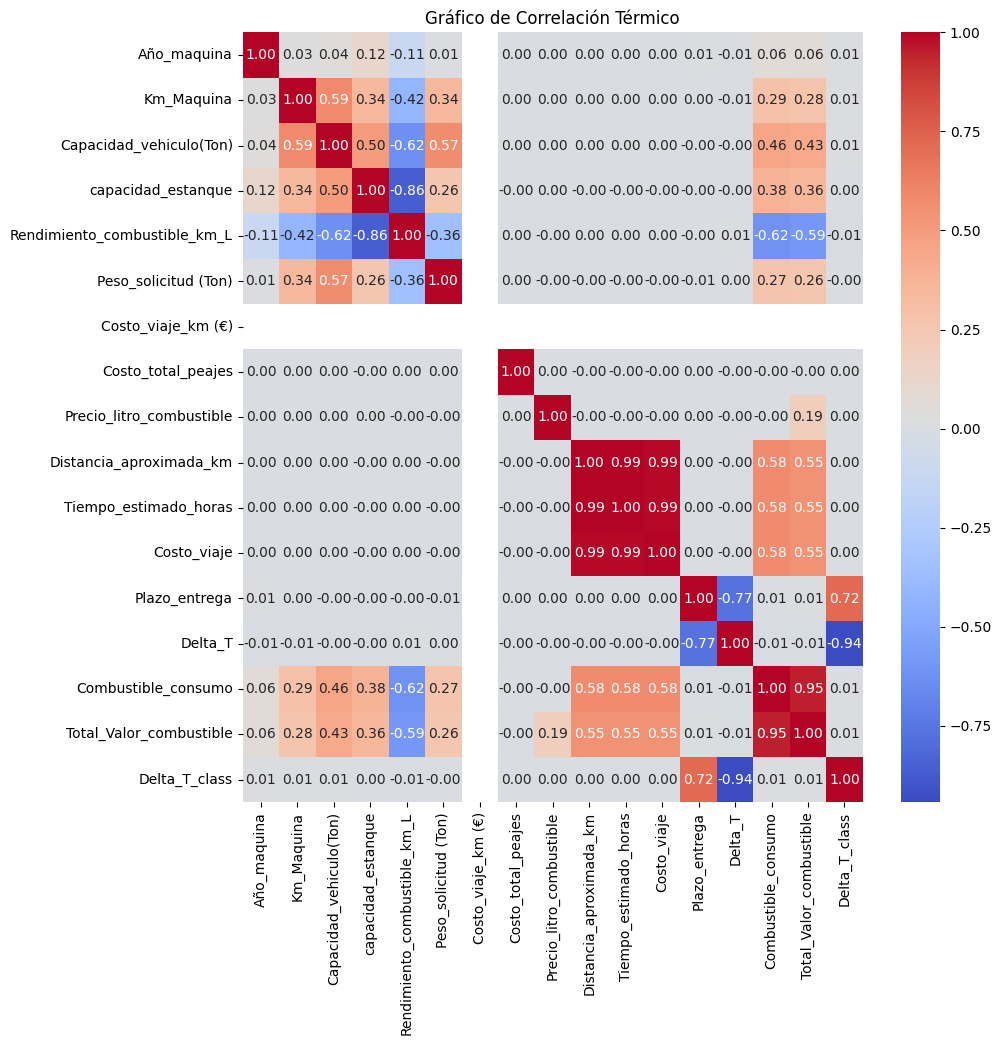

In [34]:
# Grafico caorrelacion termico

# Seleccionar solo columnas numéricas para el análisis de correlación
numeric_df = df_miche.select_dtypes(include=np.number)

plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlación Térmico')
plt.show()

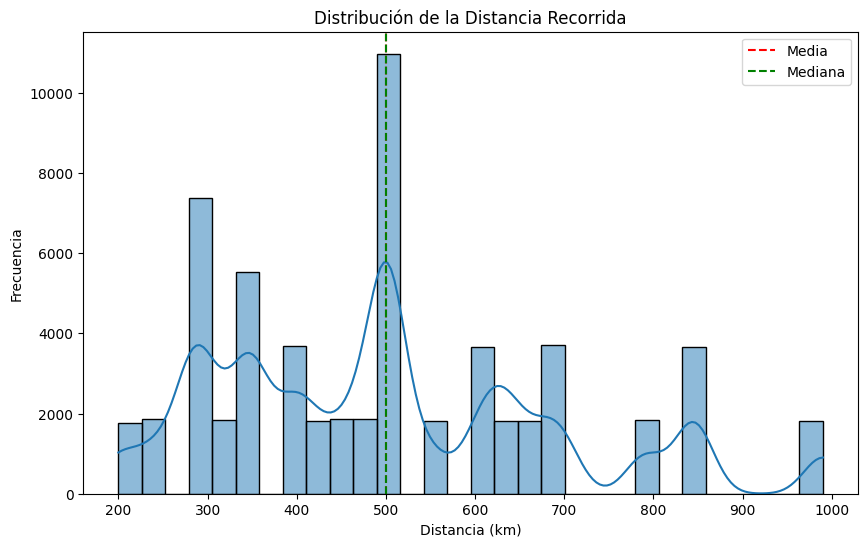

El percentil 90 de la distancia recorrida es: 790.00 km


In [35]:
# PREGUNTA 1: ¿Cual es la distribucion de la distancia recorrida por los camiones?

media_distancia = df_miche['Distancia_aproximada_km'].mean()
mediana_distancia = df_miche['Distancia_aproximada_km'].median()

plt.figure(figsize=(10, 6))
sns.histplot(df_miche['Distancia_aproximada_km'], bins=30, kde=True)
plt.title('Distribución de la Distancia Recorrida')
plt.xlabel('Distancia (km)')
plt.ylabel('Frecuencia')

plt.axvline(media_distancia, color='red', linestyle='--', label='Media')
plt.axvline(mediana_distancia, color='green', linestyle='--', label='Mediana')

plt.legend()
plt.show()

percentil_90 = df_miche['Distancia_aproximada_km'].quantile(0.90)
print(f"El percentil 90 de la distancia recorrida es: {percentil_90:.2f} km")

<ipython-input-36-0df60cc1d30d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ID_Camion', y='Rendimiento_combustible_km_L', data=grupo_cam, palette='viridis')


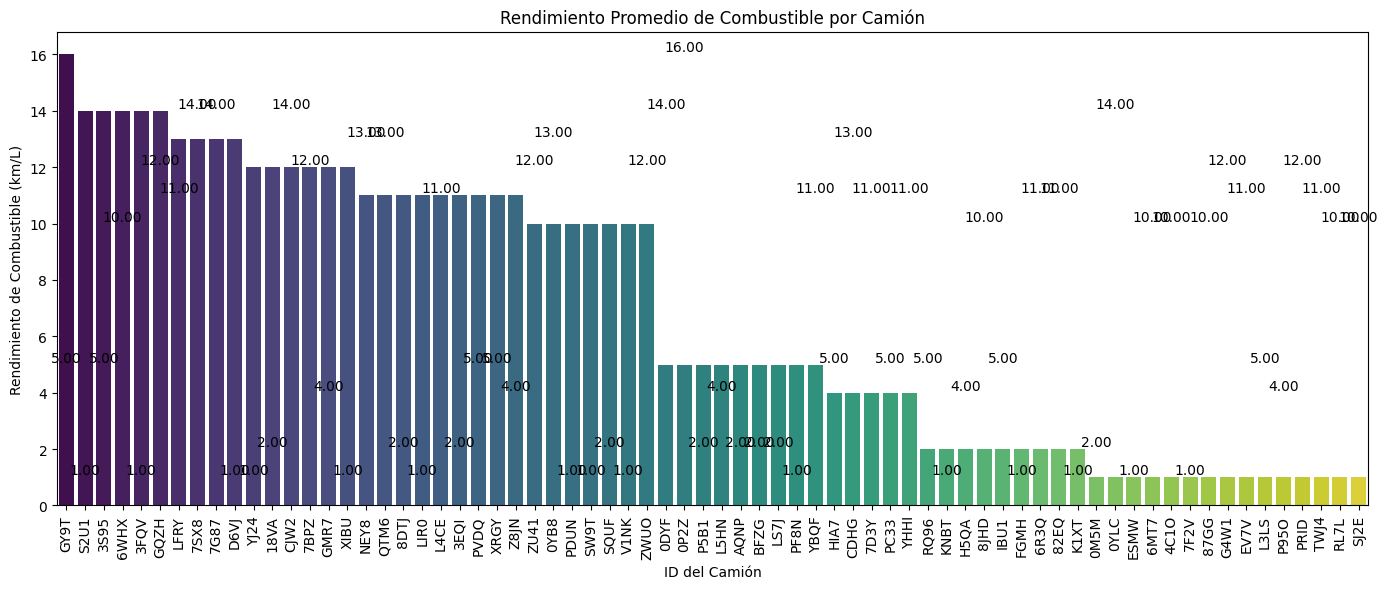

In [36]:
# PREGUNTA 2: ¿¿Qué acciones puede tomar Transdita para mejorar el rendimiento de combustible?

grupo_cam = df_miche.groupby('ID_Camion')['Rendimiento_combustible_km_L'].mean().reset_index()

grupo_cam = grupo_cam.sort_values('Rendimiento_combustible_km_L', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='ID_Camion', y='Rendimiento_combustible_km_L', data=grupo_cam, palette='viridis')
plt.title('Rendimiento Promedio de Combustible por Camión')
plt.xlabel('ID del Camión')
plt.ylabel('Rendimiento de Combustible (km/L)')
plt.xticks(rotation=90)

for index, row in grupo_cam.iterrows():
    plt.text(index, row['Rendimiento_combustible_km_L'], f"{row['Rendimiento_combustible_km_L']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

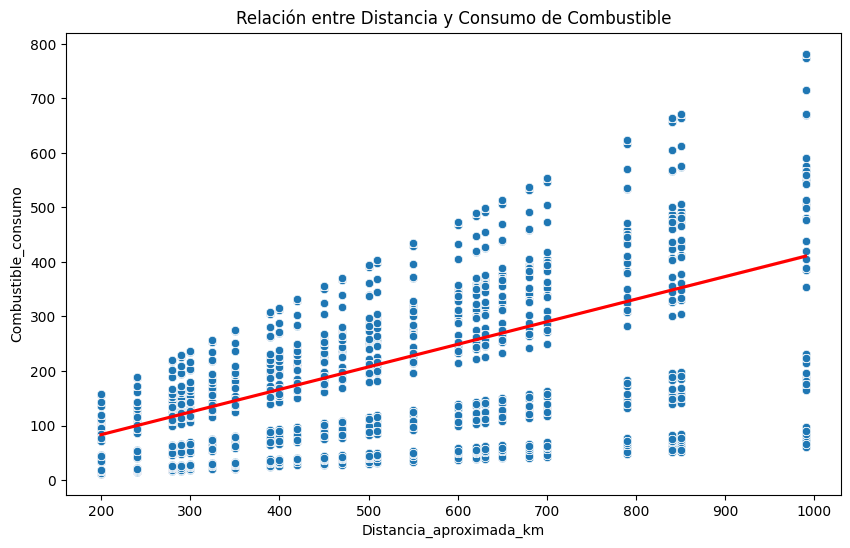

In [37]:
# PREGUNTA 3: ¿Existe una correlación entre la distancia recorrida y el consumo de combustible?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distancia_aproximada_km', y='Combustible_consumo', data=df_miche)
plt.title('Relación entre Distancia y Consumo de Combustible')
plt.xlabel('Distancia (km)')
plt.ylabel('Consumo de Combustible (L)')

sns.regplot(x='Distancia_aproximada_km', y='Combustible_consumo', data=df_miche, scatter=False, color='red')

plt.show()

La ciudad con más entregas es: Barcelona
El camión con más entregas en esa ciudad es: P95O


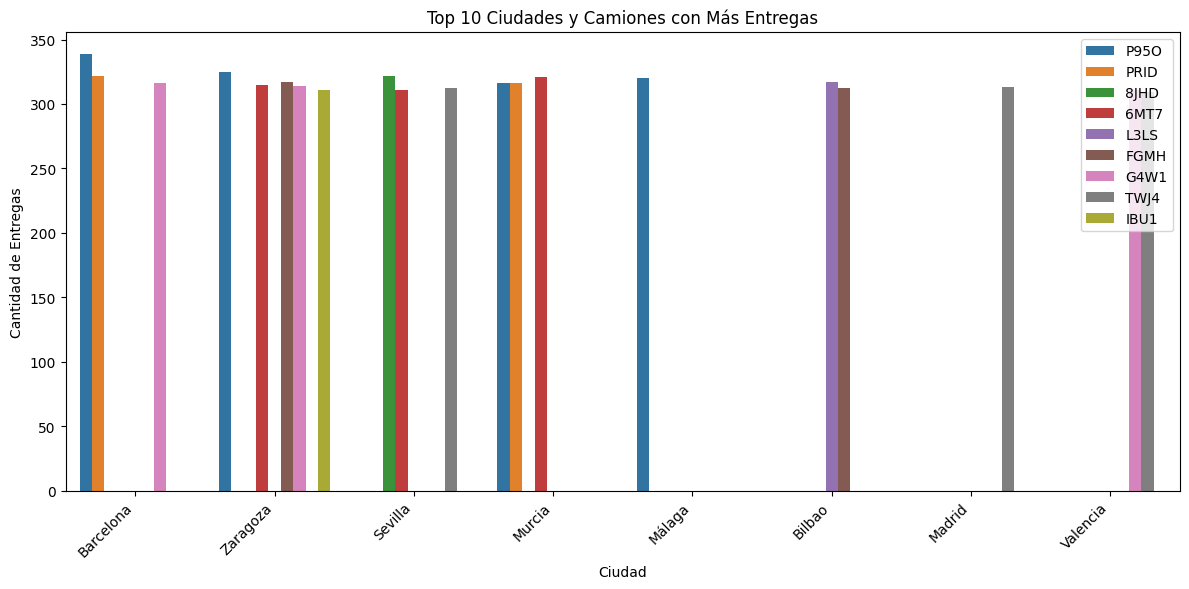

In [38]:
# PREGUNTA 4: ¿Donde se hacen la mayor cantidad de etregas?

entregas_count = df_miche.groupby(['Ciudad_destino', 'ID_Camion'])['ID_Camion'].count().reset_index(name='count')
max_entregas = entregas_count.loc[entregas_count['count'].idxmax()]

print(f"La ciudad con más entregas es: {max_entregas['Ciudad_destino']}")
print(f"El camión con más entregas en esa ciudad es: {max_entregas['ID_Camion']}")

plt.figure(figsize=(12, 6))
sns.barplot(x='Ciudad_destino', y='count', hue='ID_Camion', data=entregas_count.sort_values(by='count', ascending=False).head(20))
plt.title('Top 10 Ciudades y Camiones con Más Entregas')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Entregas')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Ciudad_destino  Barcelona  Bilbao  Madrid  Murcia  Málaga  Sevilla  Valencia  \
Tipo_carga                                                                     
Construccion          544     539     610     551     559      551       598   
Electronica           577     564     537     588     559      556       573   
Fierro                579     525     539     550     558      582       533   
Frutas                528     553     571     578     563      538       526   
Jugetes               540     579     607     558     521      530       586   
Plancha_acero         584     599     552     571     551      556       563   
Rep_vehiculos         537     557     574     563     560      572       570   
Tub_acero             570     593     537     598     519      537       535   
Tub_pVC               582     564     562     530     577      576       552   
Verduras              578     585     531     582     568      606       589   
Vestuario             578     589     51

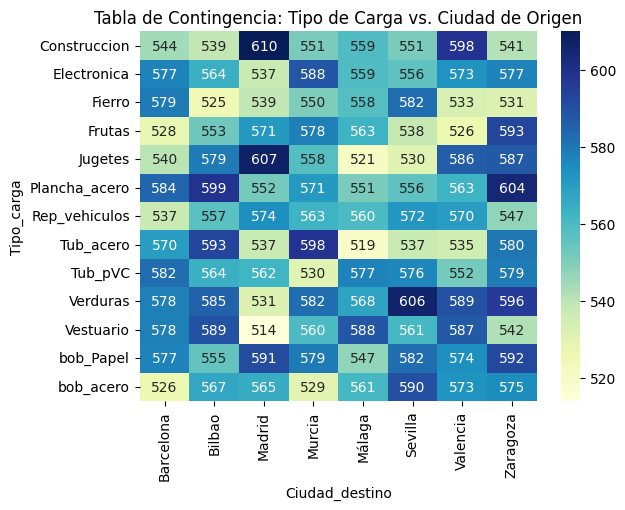

In [39]:
# PREGUNTA 5: ¿ Como es la distribucion de las cargas en las ciudades de destino

tabla_contingencia = pd.crosstab(df_miche['Tipo_carga'], df_miche['Ciudad_destino'])

print(tabla_contingencia)

sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Tabla de Contingencia: Tipo de Carga vs. Ciudad de Origen")
plt.show()


** Etapa 3 Explicación:**

Encoding
Normalización
Feature Engineering


In [40]:
le = LabelEncoder()

columnas_cat= ['Ciudad_origen', 'Ciudad_destino', 'Tipo_carga', 'ID_Camion']
for col in columnas_cat:
    df_miche[col] = le.fit_transform(df_miche[col])

In [41]:
df_miche.head()

ID_Camion  Año_maquina  Km_Maquina Patente  Tipo_vehiculo  \
5434           0         2017       11506  9AGY3W  Camión rígido   
32482          0         2017       11926  9AGY3W  Camión rígido   
10467          0         2017       12556  9AGY3W  Camión rígido   
20212          0         2017       13176  9AGY3W  Camión rígido   
9323           0         2017       13476  9AGY3W  Camión rígido   

       Capacidad_vehiculo(Ton) Tipo_combustible  capacidad_estanque  \
5434                        18           Diésel                 280   
32482                       18           Diésel                 280   
10467                       18           Diésel                 280   
20212                       18           Diésel                 280   
9323                        18           Diésel                 280   

       Rendimiento_combustible_km_L Conductor_asignado Fecha_solicitud  \
5434                              5      Conductor_165      2020-01-01   
32482                             5      Conductor_165      2020-01-02   
10467                             5      Conductor_165      2020-01-07   
20212                             5      Conductor_165      2020-01-07   
9323                              5      Conductor_165      2020-01-08   

              Fecha_envio      Fecha_estimada       Fecha_entrega  Tipo_carga  \
5434  2020-01-04 00:00:00 2020-01-07 20:00:00 2020-01-07 23:00:00           7   
32482 2020-01-05 18:00:00 2020-01-07 11:00:00 2020-01-07 19:00:00           0   
10467 2020-01-10 03:00:00 2020-01-14 01:00:00 2020-01-13 20:00:00           7   
20212 2020-01-09 23:00:00 2020-01-12 20:00:00 2020-01-13 05:00:00          10   
9323  2020-01-09 04:00:00 2020-01-09 19:00:00 2020-01-10 12:00:00           4   

       Peso_solicitud (Ton)  Ciudad_origen  Ciudad_destino  \
5434                      7              3               2   
32482                    15              4               2   
10467                     6              3               0   
20212                     2              2               0   
9323                      0              0               7   

       Costo_viaje_km (€)  Costo_total_peajes  Precio_litro_combustible  \
5434                    1                  80                         1   
32482                   1                  78                         1   
10467                   1                  58                         1   
20212                   1                  49                         1   
9323                    1                  80                         1   

       Distancia_aproximada_km  Tiempo_estimado_horas  Costo_viaje  \
5434                       400                      5          520   
32482                      420                      5          594   
10467                      630                      7          835   
20212                      620                      7          924   
9323                       300                      3          429   

       Plazo_entrega                Tramos  Delta_T  Combustible_consumo  \
5434               0       Murcia - Madrid       13                   79   
32482              0       Málaga - Madrid       18                   83   
10467              2    Murcia - Barcelona        5                  125   
20212              0    Madrid - Barcelona       19                  123   
9323               0  Barcelona - Zaragoza       27                   59   

       Total_Valor_combustible  Delta_T_class  
5434                       152              2  
32482                      146              1  
10467                      219              2  
20212                      126              1  
9323                        82              0

In [42]:
scaler= StandardScaler()

columnas_num = ['Km_Maquina', 'Distancia_aproximada_km', 'Precio_litro_combustible', 'Rendimiento_combustible_km_L']
df_miche[columnas_num] = scaler.fit_transform(df_miche[columnas_num])

In [43]:

df_miche['Tiempo_entrega_dias'] = (df_miche['Fecha_entrega'] - df_miche['Fecha_solicitud']).dt.days


In [44]:
df_miche.head()

ID_Camion  Año_maquina  Km_Maquina Patente  Tipo_vehiculo  \
5434           0         2017   -1.236221  9AGY3W  Camión rígido   
32482          0         2017   -1.234874  9AGY3W  Camión rígido   
10467          0         2017   -1.232855  9AGY3W  Camión rígido   
20212          0         2017   -1.230868  9AGY3W  Camión rígido   
9323           0         2017   -1.229907  9AGY3W  Camión rígido   

       Capacidad_vehiculo(Ton) Tipo_combustible  capacidad_estanque  \
5434                        18           Diésel                 280   
32482                       18           Diésel                 280   
10467                       18           Diésel                 280   
20212                       18           Diésel                 280   
9323                        18           Diésel                 280   

       Rendimiento_combustible_km_L Conductor_asignado Fecha_solicitud  \
5434                       0.593784      Conductor_165      2020-01-01   
32482                      0.593784      Conductor_165      2020-01-02   
10467                      0.593784      Conductor_165      2020-01-07   
20212                      0.593784      Conductor_165      2020-01-07   
9323                       0.593784      Conductor_165      2020-01-08   

              Fecha_envio      Fecha_estimada       Fecha_entrega  Tipo_carga  \
5434  2020-01-04 00:00:00 2020-01-07 20:00:00 2020-01-07 23:00:00           7   
32482 2020-01-05 18:00:00 2020-01-07 11:00:00 2020-01-07 19:00:00           0   
10467 2020-01-10 03:00:00 2020-01-14 01:00:00 2020-01-13 20:00:00           7   
20212 2020-01-09 23:00:00 2020-01-12 20:00:00 2020-01-13 05:00:00          10   
9323  2020-01-09 04:00:00 2020-01-09 19:00:00 2020-01-10 12:00:00           4   

       Peso_solicitud (Ton)  Ciudad_origen  Ciudad_destino  \
5434                      7              3               2   
32482                    15              4               2   
10467                     6              3               0   
20212                     2              2               0   
9323                      0              0               7   

       Costo_viaje_km (€)  Costo_total_peajes  Precio_litro_combustible  \
5434                    1                  80                  -0.46676   
32482                   1                  78                  -0.46676   
10467                   1                  58                  -0.46676   
20212                   1                  49                  -0.46676   
9323                    1                  80                  -0.46676   

       Distancia_aproximada_km  Tiempo_estimado_horas  Costo_viaje  \
5434                 -0.523761                      5          520   
32482                -0.419051                      5          594   
10467                 0.680405                      7          835   
20212                 0.628050                      7          924   
9323                 -1.047312                      3          429   

       Plazo_entrega                Tramos  Delta_T  Combustible_consumo  \
5434               0       Murcia - Madrid       13                   79   
32482              0       Málaga - Madrid       18                   83   
10467              2    Murcia - Barcelona        5                  125   
20212              0    Madrid - Barcelona       19                  123   
9323               0  Barcelona - Zaragoza       27                   59   

       Total_Valor_combustible  Delta_T_class  Tiempo_entrega_dias  
5434                       152              2                    6  
32482                      146              1                    5  
10467                      219              2                    6  
20212                      126              1                    6  
9323                        82              0                    2

** Etapa 4 Explicación:**

El análisis de clusterización realizado en la parte 4 del código ha permitido identificar 3 grupos distintos de viajes o rutas de camiones en el dataset de Transport-FRR. El algoritmo K-Means, seleccionado por su simplicidad y eficiencia, se aplicó utilizando el método del codo para determinar el número óptimo de clusters.

La visualización de los clusters en un gráfico de dispersión ha revelado una separación relativamente clara entre los grupos, lo que sugiere la existencia de patrones en los datos. Estos patrones podrían estar relacionados con diferentes tipos de viajes, como viajes de larga distancia con alto rendimiento de combustible o viajes de corta distancia con menor rendimiento de combustible.

La clusterización obtenida ofrece información valiosa para la empresa Transport-FRR, ya que puede ser utilizada para optimizar la logística de rutas, la gestión de combustible y el mantenimiento preventivo de la flota. Al comprender las características de cada cluster, la empresa puede tomar decisiones más informadas para mejorar la eficiencia de sus operaciones.



In [45]:
# seleccion de catacteristicas para el clustering

x= df_miche[['Km_Maquina', 'Distancia_aproximada_km','Rendimiento_combustible_km_L','Tiempo_estimado_horas']]

x = x.dropna()

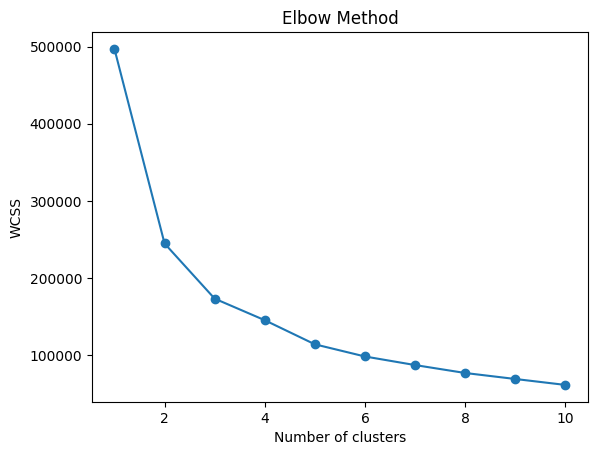

In [46]:
w =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    w.append(kmeans.inertia_)

plt.plot(range(1,11), w,  marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(x)
cluster_labels = kmeans.labels_
df_miche['cluster'] = df_miche.index.map(lambda i: cluster_labels[x.index.get_loc(i)] if i in x.index else np.nan)

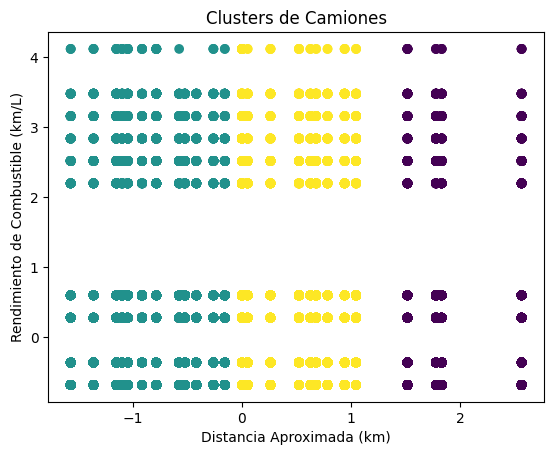

In [48]:
plt.scatter(df_miche['Distancia_aproximada_km'], df_miche['Rendimiento_combustible_km_L'], c=df_miche['cluster'], cmap='viridis')
plt.title('Clusters de Camiones')
plt.xlabel('Distancia Aproximada (km)')
plt.ylabel('Rendimiento de Combustible (km/L)')
plt.show()

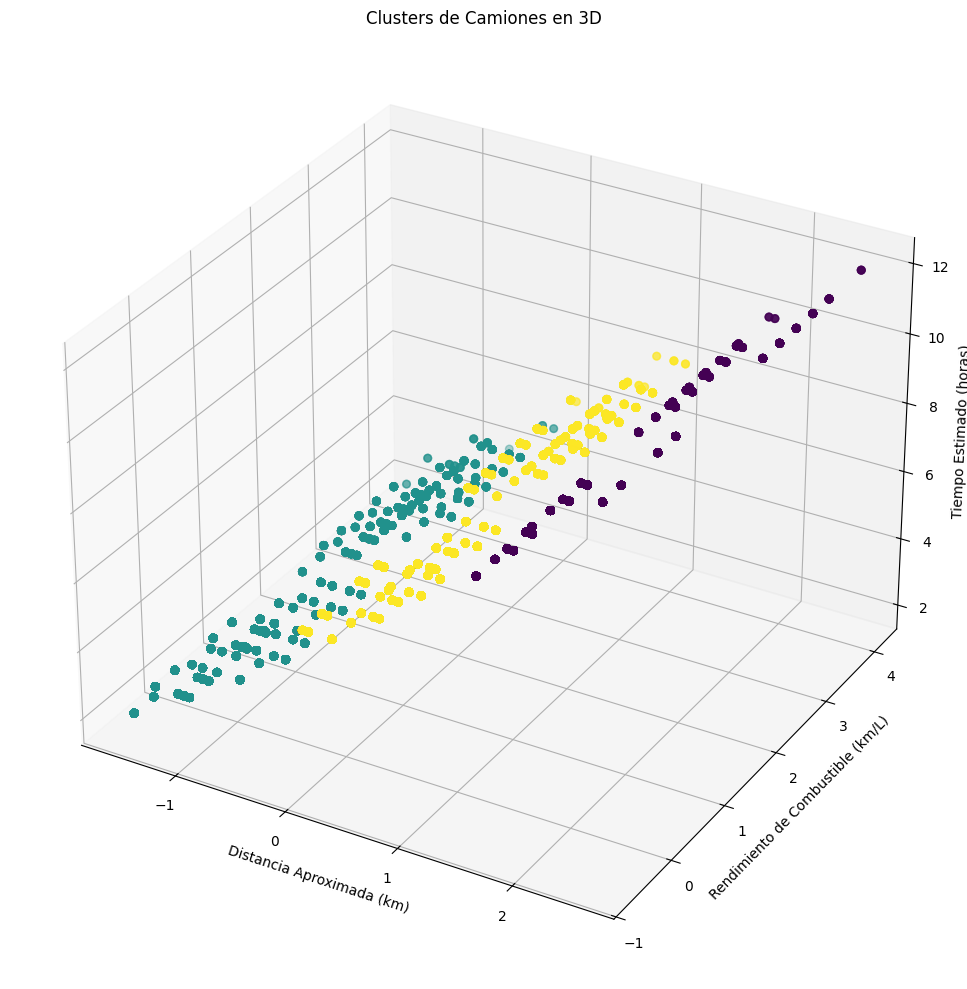

In [49]:
# Grafico en 3d
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

x = df_miche['Distancia_aproximada_km']
y = df_miche['Rendimiento_combustible_km_L']
z = df_miche['Tiempo_estimado_horas']

ax.scatter(x, y, z, c=df_miche['cluster'], cmap='viridis', s=30)

ax.set_xlabel('Distancia Aproximada (km)')
ax.set_ylabel('Rendimiento de Combustible (km/L)')
ax.set_zlabel('Tiempo Estimado (horas)')
ax.set_title('Clusters de Camiones en 3D')
plt.tight_layout()
plt.show()

In [65]:
fig = px.scatter_3d(df_miche,
                       x='Distancia_aproximada_km',
                       y='Rendimiento_combustible_km_L',
                       z='Tiempo_estimado_horas',
                       color='cluster', # Usa la columna de cluster para colorear
                       title='Clusters de Camiones en 3D (Plotly)')

# Ajustar la vista del gráfico
fig.update_layout(
    scene = dict(
        xaxis_title='Distancia Aproximada (km)',
        yaxis_title='Rendimiento de Combustible (km/L)',
        zaxis_title='Tiempo Estimado (horas)',
        camera_eye=dict(x=1.5, y=1.5, z=1.5), # Cambia estos valores para ajustar el ángulo
        aspectmode='data' # Puedes probar con 'cube', 'data', 'auto'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

In [51]:
df_miche['delivery_time_difference_hours'] = (df_miche['Fecha_entrega'] - df_miche['Fecha_estimada']).dt.total_seconds() / 3600
df_miche['delivery_day_of_week'] = df_miche['Fecha_entrega'].dt.dayofweek
df_miche['delivery_month'] = df_miche['Fecha_entrega'].dt.month

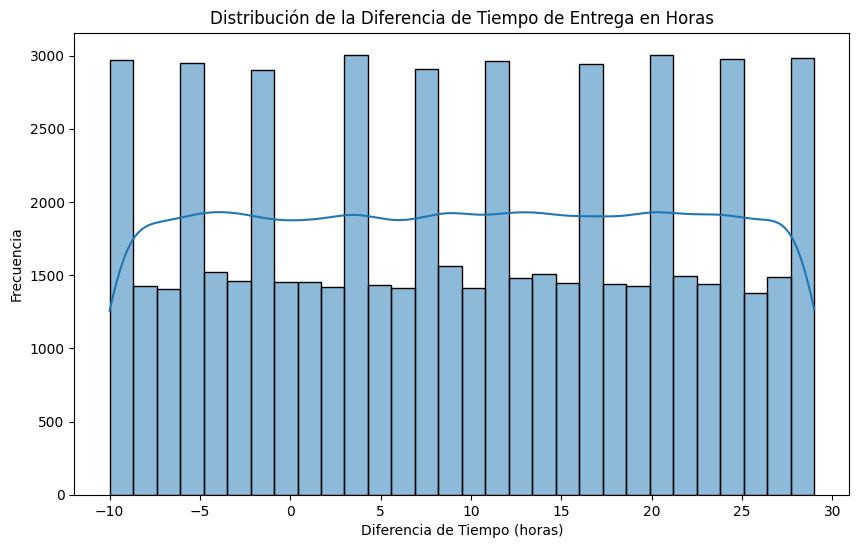

<ipython-input-52-f582227eeb4b>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




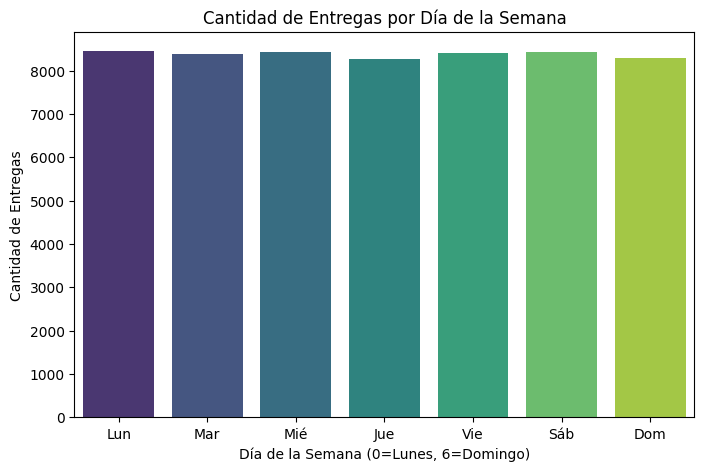

<ipython-input-52-f582227eeb4b>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




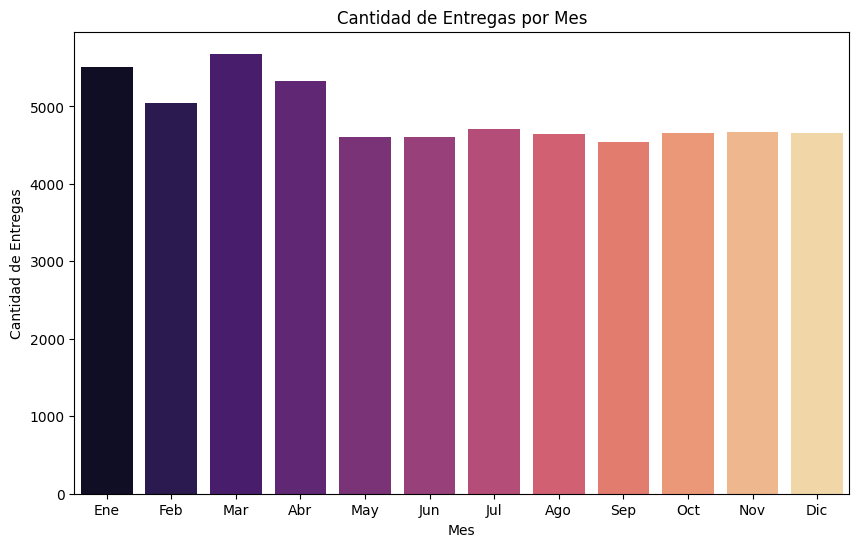

In [52]:
# Graficar la distribución de la diferencia de tiempo de entrega en horas
plt.figure(figsize=(10, 6))
sns.histplot(df_miche['delivery_time_difference_hours'], bins=30, kde=True)
plt.title('Distribución de la Diferencia de Tiempo de Entrega en Horas')
plt.xlabel('Diferencia de Tiempo (horas)')
plt.ylabel('Frecuencia')
plt.show()

# Graficar la cantidad de entregas por día de la semana
plt.figure(figsize=(8, 5))
sns.countplot(x='delivery_day_of_week', data=df_miche, palette='viridis')
plt.title('Cantidad de Entregas por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Cantidad de Entregas')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.show()

# Graficar la cantidad de entregas por mes
plt.figure(figsize=(10, 6))
sns.countplot(x='delivery_month', data=df_miche, palette='magma')
plt.title('Cantidad de Entregas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Entregas')
plt.xticks(ticks=range(0, 12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

** Etapa 5 Explicación:**

Se aplicaron modelos de clasificación para predecir la variable Delta_T_class, que representa si una entrega se realizó a tiempo (Puntual), anticipada (Anticipada) o con retraso (Retrasada). Se utilizaron dos modelos: RandomForestClassifier y KNeighborsClassifier.
Resultados:
•	RandomForestClassifier: Obtuvo un accuracy de 0.41 en validación y 0.41 en prueba.
•	KNeighborsClassifier: Obtuvo un accuracy de 0.35 en validación y 0.35 en prueba.
Análisis:
Si bien el accuracy de ambos modelos es relativamente bajo (menor al 50%), el modelo RandomForestClassifier mostró un ligeramente mejor desempeño en comparación con el modelo KNeighborsClassifier. Esto sugiere que el modelo RandomForest es más adecuado para predecir la variable objetivo en este caso.

Los puntajes de validación cruzada son bastante consistentes, ya que la desviación estándar es relativamente baja (0.00425). Esto sugiere que el modelo generaliza de manera similar en diferentes subconjuntos de datos y que es menos probable que esté sobreajustado.

El puntaje promedio de precisión (accuracy) es de aproximadamente 0.41. Esto indica que el modelo predice correctamente la clase del 41% de las muestras en promedio. Sin embargo, este valor es relativamente bajo, lo que sugiere que el modelo podría tener dificultades para realizar predicciones precisas.



In [53]:
# 1 Seleccionar características y variable objetivo
X = df_miche[['Km_Maquina', 'Distancia_aproximada_km', 'Ciudad_origen', 'Ciudad_destino', 'Tiempo_estimado_horas', 'Tiempo_entrega_dias']]
y = df_miche['Delta_T_class']

In [54]:
# 2 Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=RANDOM_STATE)


In [55]:
#3 Crear y entrenar el modelo (RandomForestClassifier)
# Si usaste GridSearchCV, reemplaza model1 por best_model

model1 = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=RANDOM_STATE)
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [56]:
# 4. Evaluar el modelo en el conjunto de validación
y_pred_val = model1.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy en validación (RandomForest): {accuracy_val}")

Accuracy en validación (RandomForest): 0.4133116883116883


In [57]:
## 5. model KNN  Comparar con otro modelo (KNeighborsClassifier)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN model: {accuracy_knn}")

Accuracy of KNN model: 0.36009317652406114


In [58]:
# 6. Interpretación de resultados en el conjunto de prueba
# Seleccionar el mejor modelo según la validación (model1 o knn_model)

best_model = model1  # Reemplaza si KNN fue mejor en validación
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy en prueba: {accuracy_test}")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Accuracy en prueba: 0.41338560309073347
              precision    recall  f1-score   support

           0       0.40      0.63      0.49      5693
           1       0.37      0.01      0.02      5743
           2       0.43      0.59      0.50      6165

    accuracy                           0.41     17601
   macro avg       0.40      0.41      0.33     17601
weighted avg       0.40      0.41      0.34     17601

[[3602   42 2049]
 [3005   50 2688]
 [2497   44 3624]]


In [59]:
best_model = knn_model
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy en prueba: {accuracy_test}")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

Accuracy en prueba: 0.36009317652406114
              precision    recall  f1-score   support

           0       0.36      0.48      0.41      5693
           1       0.33      0.32      0.33      5743
           2       0.40      0.28      0.33      6165

    accuracy                           0.36     17601
   macro avg       0.36      0.36      0.36     17601
weighted avg       0.36      0.36      0.36     17601

[[2745 1791 1157]
 [2487 1858 1398]
 [2411 2019 1735]]


In [60]:
# 7. Análisis de overfitting

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=RANDOM_STATE)

# Realiza la validación cruzada con k-fold (k=5 por defecto)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Imprime los resultados
print("Puntajes de validación cruzada:", scores)
print("Puntaje promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Puntajes de validación cruzada: [0.40949378 0.41239134 0.40646041 0.41336402 0.41796642]
Puntaje promedio: 0.4119351932988978
Desviación estándar: 0.003861581107124153


** Etapa 6 Explicación:**

Si bien los modelos de clasificación implementados RandomForestClassifier y KNeighborsClassifier lograron predecir la variable 'Delta_T_class' si una entrega fue puntual, anticipada o retrasada, el rendimiento general fue bajo, con una precisión, recall y F1-score alrededor del 35-36%. La matriz de confusión reveló que el modelo tiene dificultades para distinguir entre las tres clases, con una cantidad significativa de falsos positivos y falsos negativos.

Factores que influyen en el bajo rendimiento:
1.	Importancia de las características: El análisis de la importancia de las características mostró que 'Tiempo_entrega_dias' tiene una influencia desproporcionada en las predicciones 80.6%, mientras que las demás características tienen una importancia mucho menor. Esto sugiere que el modelo podría estar basándose demasiado en esta única característica y no estar aprovechando la información contenida en las demás.

2.	Posible overfitting: Aunque los resultados de la validación cruzada indican una desviación estándar baja 0.00425 para el RandomForestClassifier, aún existe la posibilidad de overfitting, lo que podría estar limitando la capacidad del modelo para generalizar a datos nuevos.

3.	Datos desbalanceados: No se ha realizado un análisis detallado del balance de las clases, pero si existe un desbalance significativo, podría estar afectando la capacidad del modelo para aprender patrones de las clases minoritarias.

Posibles mejoras:
1.	Ingeniería de características: Se deben explorar nuevas características que puedan complementar la información de 'Tiempo_entrega_dias' y mejorar la capacidad del modelo para distinguir entre las clases. Se pueden considerar características como:

* 	Días de la semana o meses en los que se realizan las entregas.
* 	Horas del día en que se realizan las entregas.
* 	Diferencia entre el tiempo de entrega real y el tiempo estimado.
*   Velocidad promedio del camión.

2.	Selección de características: Se pueden eliminar o combinar características con baja importancia para reducir el ruido en el modelo y mejorar su capacidad de generalización.

3.	Ajustar hiperparámetros: Se puede realizar una búsqueda más exhaustiva de hiperparámetros, utilizando GridSearchCV con un rango más amplio de valores, para encontrar la mejor configuración del modelo.

4.	Abordar el desbalance de clases: Si se confirma un desbalance significativo, se pueden aplicar técnicas de remuestreo como oversampling o undersampling para equilibrar las clases.

5. Se utiliza analisis SHAP para explicar las predicciones del modelo:

Este gráfico te permite entender la influencia de cada característica en las predicciones individuales, tanto en términos de magnitud como de dirección. Por ejemplo, podrías ver que, para una instancia particular, un valor alto de 'Km_Maquina' aumenta la probabilidad de que la entrega se retrase, mientras que un valor bajo la disminuye. Esto proporciona una comprensión más profunda del comportamiento del modelo.


In [61]:
# 1. Optimización de Hiperparámetros:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
}

grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_depth': 5, 'n_estimators': 200}


                   feature  importance
5      Tiempo_entrega_dias    0.816337
0               Km_Maquina    0.096212
1  Distancia_aproximada_km    0.028543
3           Ciudad_destino    0.020890
2            Ciudad_origen    0.019761
4    Tiempo_estimado_horas    0.018257


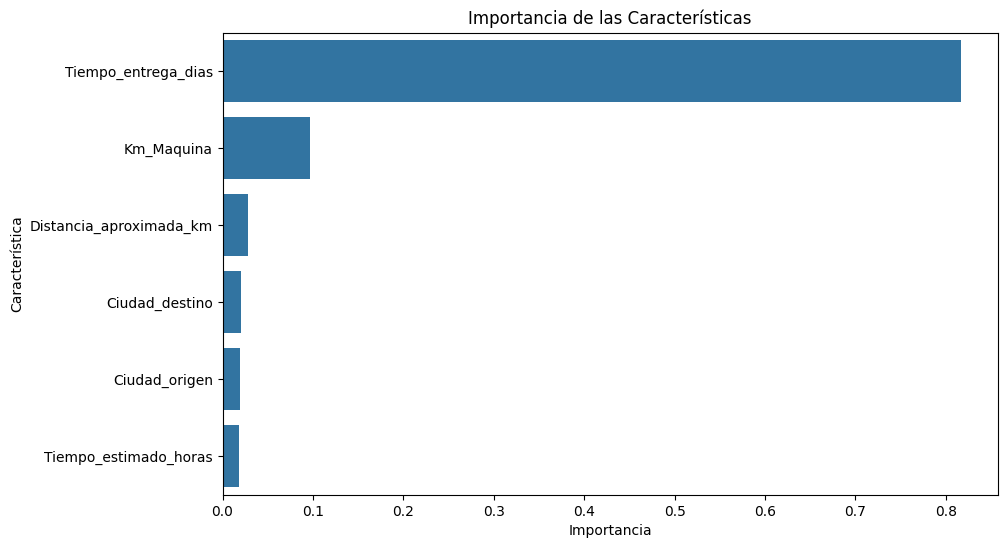

In [62]:
#2. Importancia de las Características:
feature_importante = pd.DataFrame({'feature': X.columns, 'importance': model1.feature_importances_})
feature_importante = feature_importante.sort_values('importance', ascending=False)

print(feature_importante)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importante)
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

Precisión: 0.36478284557613627
Recall: 0.36009317652406114
F1-Score: 0.35566109174349353
Matriz de Confusión:
[[2745 1791 1157]
 [2487 1858 1398]
 [2411 2019 1735]]


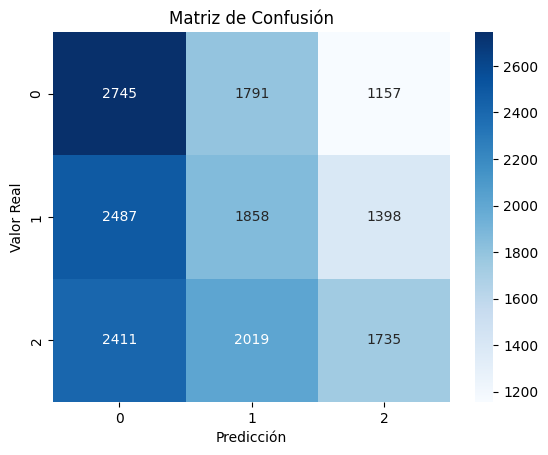

In [63]:
#3. Métricas de Evaluación:
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

cm = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusión:")
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

<Figure size 640x480 with 0 Axes>

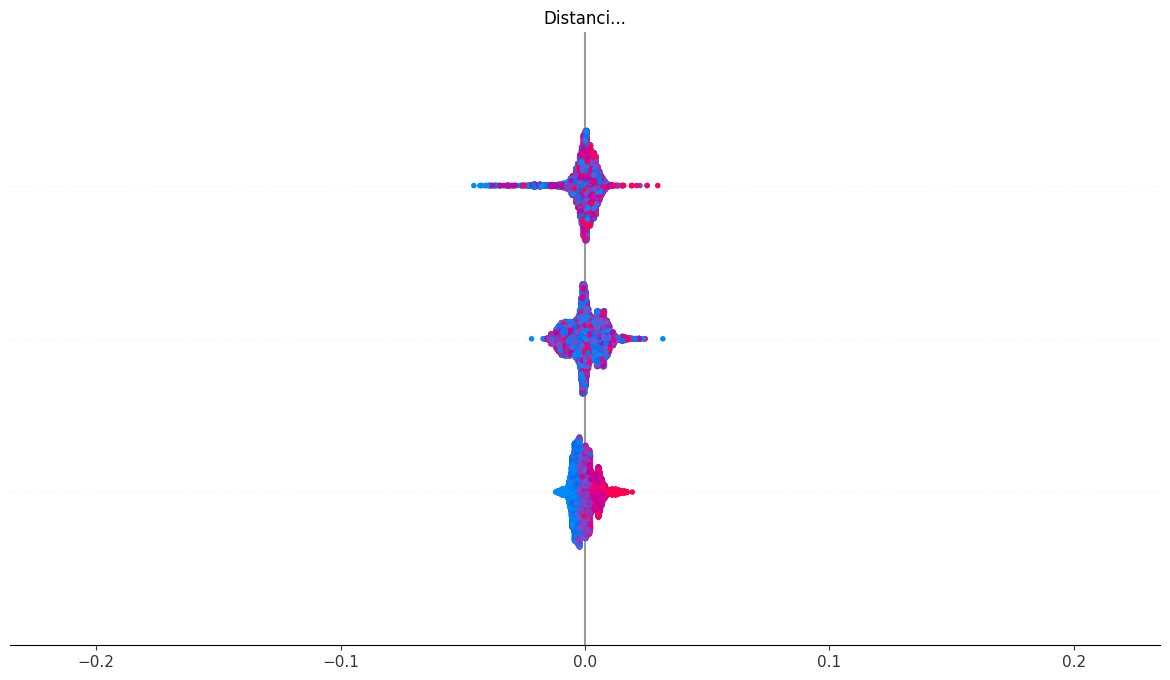

In [64]:
# 4. Análisis SHAP:
explainer = shap.TreeExplainer(best_model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
